# Import Libary

In [321]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
import re
import matplotlib.patches as patches
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_row', 100)

# Introduction

## Latar Belakang

<div style="text-align: center;">
    <img src="1200px-AmazonWebservices_Logo_svg.png" alt="Description" width="1200" height="400">
</div>


Amazon Web Services (AWS) adalah sebuah platform komputasi cloud yang disediakan oleh Amazon, yang menawarkan berbagai layanan IT sesuai kebutuhan, mulai dari penyimpanan data, pemrosesan, analitik, keamanan, hingga machine learning. AWS adalah layanan cloud yang paling banyak digunakan di dunia dengan lebih dari 200 layanan cloud penuh fitur yang tersedia dari pusat data di seluruh dunia1. Dengan menggunakan AWS, perusahaan dapat menurunkan biaya infrastruktur IT, meningkatkan fleksibilitas dan skalabilitas, serta mempercepat inovasi. AWS mendukung berbagai industri, mulai dari pemula hingga perusahaan besar, dengan keandalan dan keamanan yang tinggi, serta komunitas yang luas.

Dataset ini berisi data penjualan dari berbagai layanan SaaS yang di-hosting menggunakan AWS. Layanan-layanan SaaS ini memanfaatkan infrastruktur AWS untuk menyediakan aplikasi berbasis cloud kepada pelanggan mereka, memungkinkan akses yang mudah dan fleksibel dari berbagai perangkat yang terhubung internet. Data ini mencakup informasi terkait berbagai aspek operasi SaaS, seperti jumlah pelanggan, pendapatan, dan metrik kinerja lainnya.

Dengan menggunakan AWS, penyedia layanan SaaS dapat mengurangi beban operasional pada infrastruktur mereka sendiri, meningkatkan efisiensi, dan fokus untuk memperbaiki layanan mereka. AWS memberikan manfaat seperti skalabilitas otomatis, manajemen penyimpanan data, dan keamanan tingkat tinggi, yang sangat penting bagi penyedia SaaS dalam melayani kebutuhan pelanggan mereka secara optimal.

Secara keseluruhan, dataset ini memberikan wawasan tentang bagaimana berbagai layanan SaaS yang memanfaatkan AWS beroperasi, berkinerja, dan berkembang seiring waktu. Hal ini memungkinkan analisis yang lebih mendalam tentang tren penggunaan dan peluang optimalisasi dalam layanan SaaS yang difasilitasi oleh AWS

## Rumusan Masalah

Stakeholder perusahaan ingin memahami dampak pandemi COVID-19 terhadap profitabilitas (Profit) dengan membandingkan profit perusahaan selama masa pandemi (2020–2021) dan pasca-pandemi (2022–2023). Fokusnya adalah untuk mengetahui apakah terdapat perbedaan signifikan dalam pola pembelian pelanggan dan profitabilitas antara kedua periode tersebut.

Berdasarkan Keinginan stakeholder dibuat rumusan masalah sebagai berikut :

1. Apakah terdapat perbedaan profitabilitas (Profit) antara tahun pandemi COVID-19 (2020–2021) dan pasca-pandemi (2022–2023)?

1. Strategi apa yang sebaiknya dikembangkan perusahaan untuk di masa yang akan datang agar perusahaan bisa menyusun strategi untuk menghadapi situasi serupa di masa depan?

1. Dari setiap Region, Industry, Segment dan Product apa saja yang memengaruhi perbedaan profitabilitas antara kedua periode tersebut?

## Tujuan

Dengan mengetahui perbedaan ini, stakeholder berharap dapat mengidentifikasi faktor-faktor yang memengaruhi performa perusahaan selama pandemi dan bagaimana perubahan tersebut terjadi setelah pandemi. Analisis ini akan menjadi dasar dalam menyusun strategi untuk menghadapi situasi serupa di masa depan.

# Read dataset

In [374]:
df = pd.read_csv("SaaS-Sales.csv")
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


# Data cleaning

## Handling Character

In [323]:
# Fungsi untuk memeriksa karakter spesial dan mencetak karakter yang ditemukan
def check_special_characters(column):
    special_characters = re.compile(r'[^a-zA-Z0-9\s-]')
    return df[column].apply(lambda x: special_characters.findall(str(x)))

# Memeriksa setiap kolom
special_char_columns = {col: check_special_characters(col) for col in df.columns}

# Menampilkan hasil
for col, special_chars in special_char_columns.items():
    if any(special_chars):
        print(f"Kolom: {col} mengandung karakter spesial: {set([char for sublist in special_chars for char in sublist])}")
    else:
        print(f"Kolom: {col} tidak mengandung karakter spesial.")


Kolom: Row ID tidak mengandung karakter spesial.
Kolom: Order ID tidak mengandung karakter spesial.
Kolom: Order Date mengandung karakter spesial: {'/'}
Kolom: Date Key tidak mengandung karakter spesial.
Kolom: Contact Name tidak mengandung karakter spesial.
Kolom: Country tidak mengandung karakter spesial.
Kolom: City mengandung karakter spesial: {'í', 'é', 'ó', 'ö', 'á', 'ã'}
Kolom: Region tidak mengandung karakter spesial.
Kolom: Subregion tidak mengandung karakter spesial.
Kolom: Customer mengandung karakter spesial: {'.', '&'}
Kolom: Customer ID tidak mengandung karakter spesial.
Kolom: Industry tidak mengandung karakter spesial.
Kolom: Segment tidak mengandung karakter spesial.
Kolom: Product tidak mengandung karakter spesial.
Kolom: License tidak mengandung karakter spesial.
Kolom: Sales mengandung karakter spesial: {'.'}
Kolom: Quantity tidak mengandung karakter spesial.
Kolom: Discount mengandung karakter spesial: {'.'}
Kolom: Profit mengandung karakter spesial: {'.'}


Di dalam dataset tidak terdapat character

In [324]:
# Fungsi untuk memeriksa kesesuaian antara Order Date dan Date Key
def check_date_key(order_date, date_key):
    # Mengubah Order Date menjadi format YYYYMMDD
    formatted_date = pd.to_datetime(order_date).strftime('%Y%m%d')
    return formatted_date == str(date_key)

# Memeriksa setiap baris dalam dataset
df['Date_Match'] = df.apply(lambda row: check_date_key(row['Order Date'], row['Date Key']), axis=1)

# Menampilkan hasil
mismatched_rows = df[~df['Date_Match']]
if not mismatched_rows.empty:
    print("Baris yang tidak sesuai:")
    print(mismatched_rows)
else:
    print("Semua baris sesuai antara Order Date dan Date Key.")

# Menghapus kolom Date_Match 
df.drop(columns=['Date_Match'], inplace=True)

Semua baris sesuai antara Order Date dan Date Key.


## Handling Missing Value & Duplicate Data

In [325]:
# Mengecek apakah ada nilai null
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = (col_na / len(df))*100
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    
    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
        
    else:
        print(missing_data[missing_data['Total'] > 0])

In [326]:
cek_null(df)

Tidak ditemukan missing value pada dataset


In [327]:
df.duplicated().sum()

0

Dataset ini tidak mengandung nilai yang hilang (missing value) maupun duplikat data

## Handling Outlier

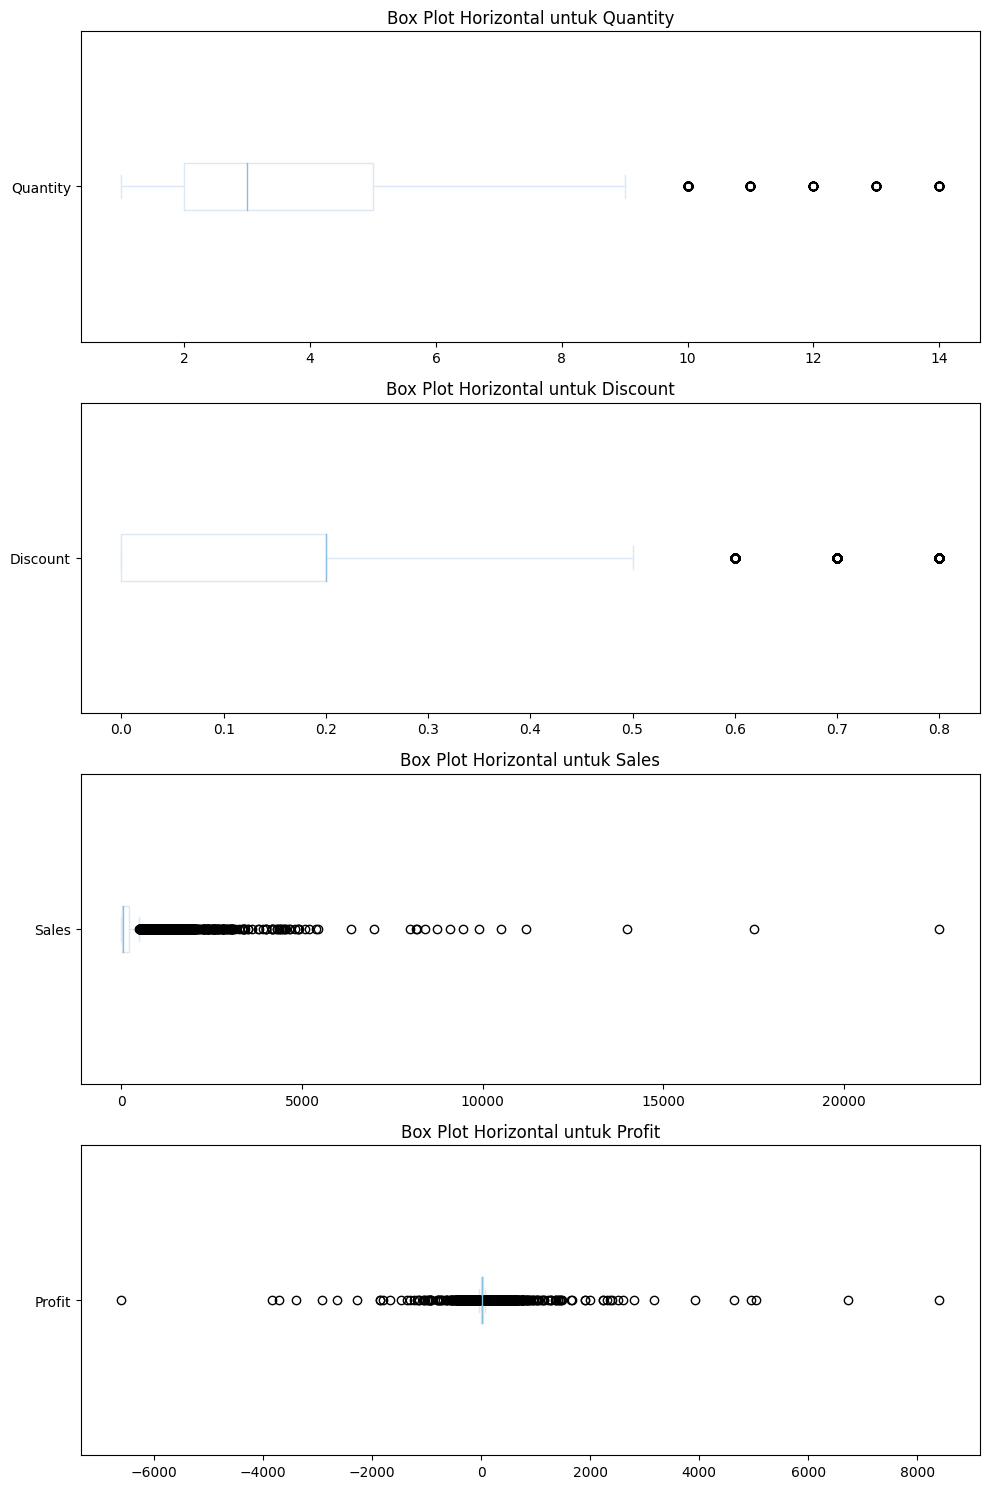

In [328]:
# Memilih kolom yang diinginkan
df_num = df[['Quantity', 'Discount', 'Sales', 'Profit']]

# Membuat 4 subplot berbeda secara vertikal
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 15))

# Box plot horizontal untuk Quantity
df_num['Quantity'].plot(kind='box', ax=axes[0], title='Box Plot Horizontal untuk Quantity', vert=False)

# Box plot horizontal untuk Discount
df_num['Discount'].plot(kind='box', ax=axes[1], title='Box Plot Horizontal untuk Discount', vert=False)

# Box plot horizontal untuk Sales
df_num['Sales'].plot(kind='box', ax=axes[2], title='Box Plot Horizontal untuk Sales', vert=False)

# Box plot horizontal untuk Profit
df_num['Profit'].plot(kind='box', ax=axes[3], title='Box Plot Horizontal untuk Profit', vert=False)

# Menampilkan plot
plt.tight_layout()
plt.show()


### Isnight Boxplot

Untuk kolom **Quantity** dan **Discount**, outlier yang ada masih masuk akal dan dapat diterima dalam konteks analisis keseluruhan. Outlier pada kolom ini tidak menunjukkan anomali yang signifikan dan dapat dianggap sebagai variasi normal dalam data (tidak ada data yang minus dan masih di rentang nilai yang masuk akal).

Untuk kolom **Sales** dan **Profit**, outlier perlu diperhatikan lebih dalam dan akan dilanjutkan dibawah ini.

## Contextual Outlier Sales & Profit

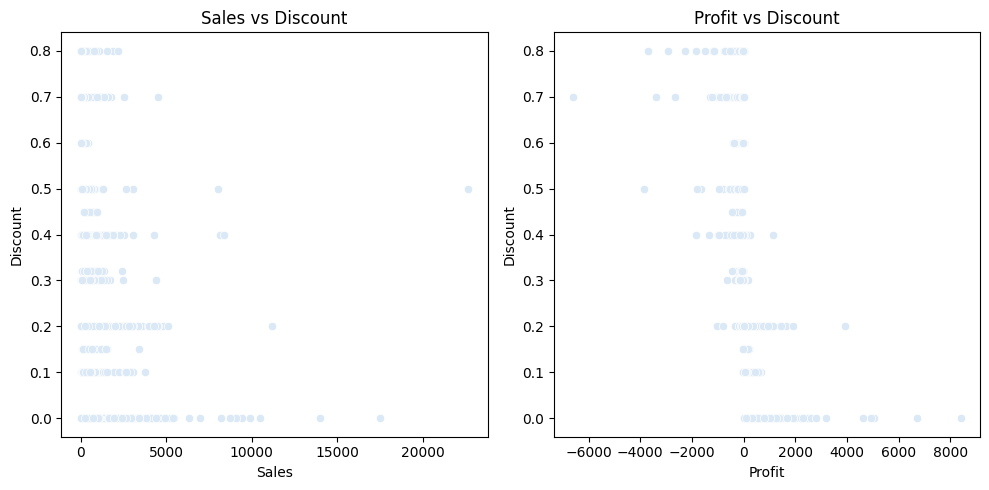

In [329]:
# Membuat subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Scatter plot untuk Sales vs Discount
sns.scatterplot(x=df['Sales'], y=df['Discount'], ax=axes[0])
axes[0].set_title('Sales vs Discount')

# Scatter plot untuk Profit vs Discount
sns.scatterplot(x=df['Profit'], y=df['Discount'], ax=axes[1])
axes[1].set_title('Profit vs Discount')

# Menampilkan plot
plt.tight_layout()
plt.show()


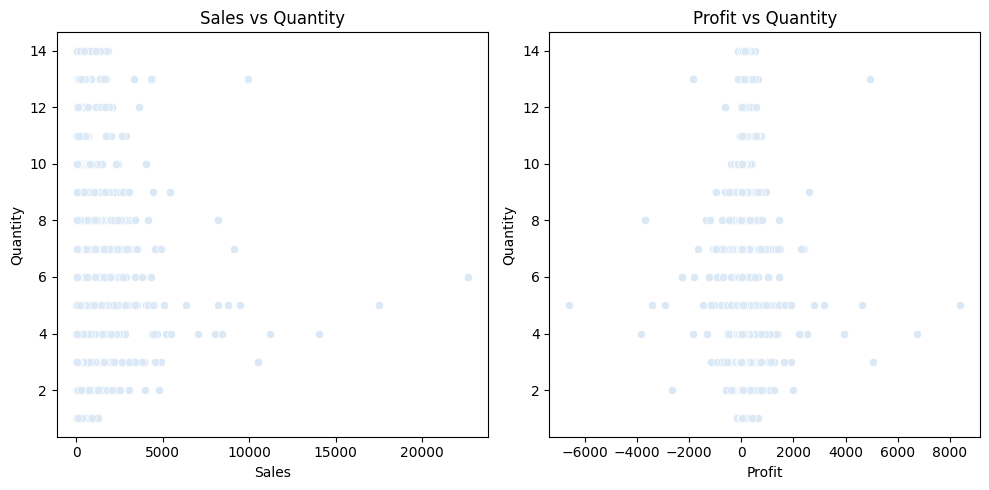

In [330]:
# Membuat subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Scatter plot untuk Sales vs Profit
sns.scatterplot(x=df['Sales'], y=df['Quantity'], ax=axes[0])
axes[0].set_title('Sales vs Quantity')

# Scatter plot untuk Profit vs Profit
sns.scatterplot(x=df['Profit'], y=df['Quantity'], ax=axes[1])
axes[1].set_title('Profit vs Quantity')

# Menampilkan plot
plt.tight_layout()
plt.show()

<Axes: xlabel='Sales', ylabel='Profit'>

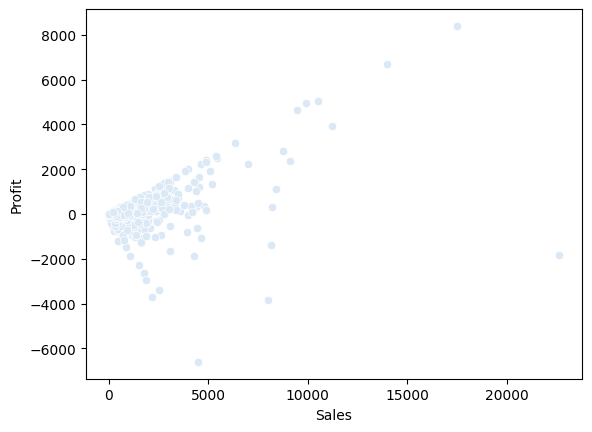

In [331]:
sns.scatterplot(x=df['Sales'],y=df["Profit"])

In [332]:
# Menyaring data dengan penjualan di atas 20.000
filtered_data = df[df['Sales'] > 20000]

# Menampilkan data yang telah difilter
display(filtered_data)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
2697,2698,EMEA-2020-145317,3/18/2020,20200318,Diane Murray,Germany,Berlin,EMEA,EU-WEST,Anthem,1029,Healthcare,Enterprise,Big Ol Database,SGJPOTVE6H,22638.48,6,0.5,-1811.0784



Untuk kolom **Sales** dan **Profit**, saya akan membiarkan outlier tetap ada, karena saya ingin menganalisis tentang profit dan sales dan melihat apakah ada pola atau tidak untuk profit dan sales

# EDA

## Data Understanding

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [375]:
# Menghapus kolom Date Key
df.drop(columns=['Date Key'], inplace=True)

Kolom `Date Key` telah dihapus dari dataset karena tidak digunakan dan bersifat redundan.

Berikut merupakan penjelasan Setiap Kolom di dalam dataset :
| Nama Kolom     | Deskripsi Kolom                                           |
|----------------|-----------------------------------------------------------|
| Row ID         | Sebuah pengenal unik untuk setiap transaksi.              |
| Order ID       | Sebuah pengenal unik untuk setiap pesanan.                |
| Order Date     | Tanggal ketika pesanan dilakukan.                         |
| Contact Name   | Nama orang yang melakukan pesanan.                        |
| Country        | Negara tempat pesanan dilakukan.                          |
| City           | Kota tempat pesanan dilakukan.                            |
| Region         | Wilayah tempat pesanan dilakukan.                         |
| Subregion      | Subwilayah tempat pesanan dilakukan.                      |
| Customer       | Nama perusahaan yang melakukan pesanan.                   |
| Customer ID    | Sebuah pengenal unik untuk setiap pelanggan.              |
| Industry       | Industri tempat pelanggan berada.                         |
| Segment        | Segmen pelanggan (SMB, Strategic, Enterprise).      |
| Product        | Produk yang dipesan.                                      |
| License        | Kunci lisensi untuk produk.                               |
| Sales          | Jumlah total penjualan untuk transaksi.                   |
| Quantity       | Jumlah total barang dalam transaksi.                      |
| Discount       | Diskon yang diterapkan pada transaksi.                    |
| Profit         | Keuntungan dari transaksi.                                |


In [376]:
# Mengubah kolom Order Date menjadi tipe data datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')


Mengubah kolom order date menjadi Date time

In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Contact Name  9994 non-null   object        
 4   Country       9994 non-null   object        
 5   City          9994 non-null   object        
 6   Region        9994 non-null   object        
 7   Subregion     9994 non-null   object        
 8   Customer      9994 non-null   object        
 9   Customer ID   9994 non-null   int64         
 10  Industry      9994 non-null   object        
 11  Segment       9994 non-null   object        
 12  Product       9994 non-null   object        
 13  License       9994 non-null   object        
 14  Sales         9994 non-null   float64       
 15  Quantity      9994 non-null   int64   

Dataset ini terdiri dari 9.993 baris data dan 18 kolom.

In [337]:
df_num = df[["Order Date",'Quantity', "Discount",'Sales', "Profit"]] # Order date dianggap sementara numerika dikarenakan untuk melihat tanggal terkecil dan tanggal terbesar
df_cat = df[['Row ID',"Customer ID",'Order ID'	,'Contact Name',"Order Date",	"Country",	"City",	"Region",	"Subregion","Customer",	"Industry",	"Segment",	"Product",	'License']] # Order date digunakan untuk melihat tanggal yang paling banyak keluar dan unique value ada berapa

# Mengubah semua kolom menjadi tipe data object 
df_cat = df_cat.astype(str)

# To show each column statistic descriptive
display(df_num.describe(), df_cat.describe(include='object'))

,Order Date,Quantity,Discount,Sales,Profit
count,9994,9994.000000,9994.000000,9994.000000,9994.000000
mean,2022-05-01 00:07:12.259355648,3.789574,0.156203,229.858001,28.656896
min,2020-01-04 00:00:00,1.000000,0.000000,0.444000,-6599.978000
25%,2021-05-23 00:00:00,2.000000,0.000000,17.280000,1.728750
50%,2022-06-27 00:00:00,3.000000,0.200000,54.490000,8.666500
75%,2023-05-15 00:00:00,5.000000,0.200000,209.940000,29.364000
max,2023-12-31 00:00:00,14.000000,0.800000,22638.480000,8399.976000
std,NaN,2.225110,0.206452,623.245101,234.260108


,Row ID,Customer ID,Order ID,Contact Name,Order Date,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,9994,99,5009,793,1237,48,262,3,12,99,10,3,14,9994
top,1,1080,EMEA-2023-100111,Leonard Kelly,2022-09-06,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,1,192,14,37,38,2001,922,4219,2507,192,2127,5191,1842,1


Berdasarkan hasil script di atas, dapat disimpulkan bahwa:

1. **Order Date**: Dataset mencakup periode mulai tanggal 4 Januari 2020 hingga 31 Desember 2023. Terdapat 1.237 hari di mana transaksi terjadi. Hari dengan jumlah transaksi terbanyak adalah pada tanggal 6 September 2022, dengan 38 transaksi yang dilakukan pada hari tersebut.
2. **Row ID & License**: Terdapat 9.994 data unik dalam kolom ini, yang menunjukkan setiap baris memiliki Row ID dan License yang berbeda dan terdapat sebanyak 9.994 transasksi yang berbeda.
3. **Country**: Dataset mencakup 48 negara, dengan United States sebagai negara yang paling banyak bertransaksi.
4. **City**: Dataset mencakup 262 kota, dengan London sebagai kota yang paling banyak melakukan transaksi.
5. **Region**: Dataset mencakup 3 region, dengan EMEA sebagai region yang paling banyak melakukan transaksi.
6. **Subregion**: Dataset mencakup 12 subregion, dengan NAMER sebagai subregion yang paling banyak melakukan transaksi.
7. **Customer & Customer ID**: Terdapat 99 nama pelanggan yang berbeda, dengan Allianz sebagai pelanggan yang paling banyak bertransaksi, yakni sebanyak 192 transaksi.
8. **Segment**: Dataset mencakup 3 segmen, dengan SMB sebagai segmen yang paling banyak melakukan transaksi.
9. **Product**: Terdapat 14 produk yang ditawarkan oleh AWS SaaS, dengan ContactMatcher sebagai produk terlaris yang dibeli sebanyak 1.842 kali.
10. **Order ID**: terdapat 5009 pesanan yang berbeda


In [338]:
df['Region'].unique()

array(['EMEA', 'AMER', 'APJ'], dtype=object)

Dataset ini mencakup tiga region yang berbeda, yaitu `EMEA` (Europe, Middle East, and Africa), `AMER` (Americas) dan `APJ` (Asia Pacific and Japan)

In [339]:
df.groupby('Region')['Subregion'].unique().reset_index()

,Region,Subregion
0,AMER,"[NAMER, LATAM]"
1,APJ,"[JAPN, ANZ, APAC, IND]"
2,EMEA,"[UKIR, EU-WEST, NOR, EU, MEA, EU-EAST]"


Dataset ini mencakup tiga region yang berbeda, yaitu `EMEA` (Europe, Middle East, and Africa), `AMER` (Americas) dan `APJ` (Asia Pacific and Japan)

In [340]:
df.groupby('Region')['Country'].unique().reset_index()

,Region,Country
0,AMER,"[United States, Canada, Costa Rica, Brazil, Chile, Colombia, Mexico, Argentina]"
1,APJ,"[Japan, Australia, Philippines, India, Singapore, New Zealand, South Korea, China, Indonesia, Taiwan]"
2,EMEA,"[Ireland, Germany, Sweden, Italy, Turkey, France, Luxembourg, United Kingdom, Spain, South Africa, Portugal, Belgium, Russia, Netherlands, Poland, Czech Republic, Saudi Arabia, Finland, Israel, Norway, Ukraine, United Arab Emirates, Greece, Austria, Egypt, Denmark, Croatia, Qatar, Slovenia, Iceland]"


In [341]:
df.groupby('Subregion')['Country'].unique().reset_index()

,Subregion,Country
0,ANZ,"[Australia, New Zealand]"
1,APAC,"[Philippines, Singapore, South Korea, China, Indonesia, Taiwan]"
2,EU,[Italy]
3,EU-EAST,"[Russia, Czech Republic, Israel, Ukraine, Greece]"
4,EU-WEST,"[Germany, France, Luxembourg, Spain, Portugal, Belgium, Netherlands, Poland, Austria, Denmark, Croatia, Slovenia, Iceland]"
5,IND,[India]
6,JAPN,[Japan]
7,LATAM,"[Costa Rica, Brazil, Chile, Colombia, Mexico, Argentina]"
8,MEA,"[Turkey, South Africa, Saudi Arabia, United Arab Emirates, Egypt, Qatar]"
9,NAMER,"[United States, Canada]"


In [342]:
df["Segment"].unique()

array(['SMB', 'Strategic', 'Enterprise'], dtype=object)

Di dalam dataset terdapat tiga segmentasi yaitu `SMB` (small and medium business), `strategic` dan `Enterprise`

In [343]:
display(df["Industry"].unique(), df["Industry"].nunique())

array(['Energy', 'Finance', 'Tech', 'Healthcare', 'Manufacturing',
       'Retail', 'Consumer Products', 'Misc', 'Transportation',
       'Communications'], dtype=object)

10

Pelanggan dari AWS bergerak di dalam 10 industri yang berbeda yaitu 'Energy', 'Finance', 'Tech', 'Healthcare', 'Manufacturing',
       'Retail', 'Consumer Products', 'Misc', 'Transportation',
       dan 'Communications'

In [344]:
display(df["Product"].unique(), df["Product"].nunique())

array(['Marketing Suite', 'FinanceHub', 'ContactMatcher',
       'Marketing Suite - Gold', 'SaaS Connector Pack', 'ChatBot Plugin',
       'Site Analytics', 'OneView', 'Support', 'Data Smasher',
       'SaaS Connector Pack - Gold', 'Storage', 'Big Ol Database',
       'Alchemy'], dtype=object)

14

Produk yang ditawarkan AWS ada 14 Saas yang berbeda yaitu 'Marketing Suite', 'FinanceHub', 'ContactMatcher',
       'Marketing Suite - Gold', 'SaaS Connector Pack', 'ChatBot Plugin',
       'Site Analytics', 'OneView', 'Support', 'Data Smasher',
       'SaaS Connector Pack - Gold', 'Storage', 'Big Ol Database' dan
       'Alchemy'

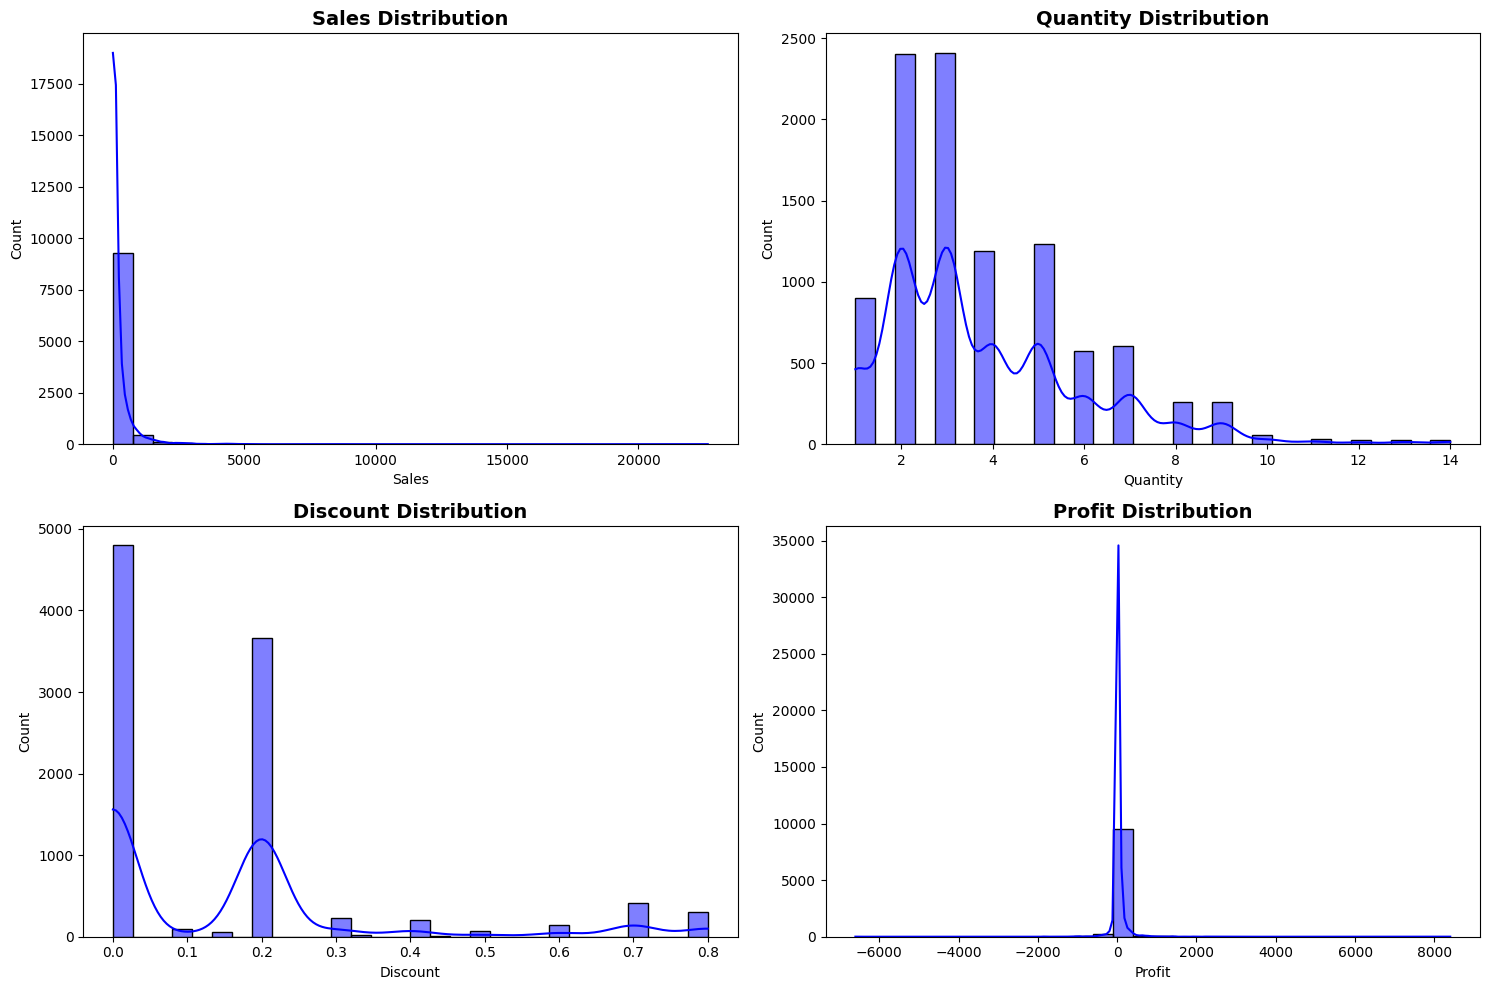

In [363]:
# Analyzing distribution of numerical data consist of Sales, Discount, Quantity, and Profit

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Sales Distribution
sns.histplot(df['Sales'], bins=30, kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Sales Distribution', fontdict={'fontsize': 14, 'fontweight': 'bold'})

# Quantity Distribution
sns.histplot(df['Quantity'], bins=30, kde=True, ax=axes[0, 1], color='blue')
axes[0, 1].set_title('Quantity Distribution', fontdict={'fontsize': 14, 'fontweight': 'bold'})

# Discount Distribution
sns.histplot(df['Discount'], bins=30, kde=True, ax=axes[1, 0], color='blue')
axes[1, 0].set_title('Discount Distribution', fontdict={'fontsize': 14, 'fontweight': 'bold'})

# Profit Distribution
sns.histplot(df['Profit'], bins=30, kde=True, ax=axes[1, 1], color='blue')
axes[1, 1].set_title('Profit Distribution', fontdict={'fontsize': 14, 'fontweight': 'bold'})

plt.tight_layout()
plt.show()


In [365]:
import scipy.stats as stats

# List of numerical columns to test
numerical_columns = ['Sales', 'Discount', 'Quantity', 'Profit']

# Dictionary to store the results
normaltest_results = {}

# Perform normality test for each numerical column
for column in numerical_columns:
    stat, p_value = stats.normaltest(df[column])
    normaltest_results[column] = {'statistic': stat, 'p_value': p_value}

# Display the results
for column, result in normaltest_results.items():
    print(f"Column: {column}, Statistic: {result['statistic']:.2f}, P-Value: {result['p_value']:.4f}")
    if result['p_value'] < 0.05:
        print(f"The data in the {column} column is not normally distributed.")
    else:
        print(f"The data in the {column} column is normally distributed.")



Column: Sales, Statistic: 18033.31, P-Value: 0.0000
The data in the Sales column is not normally distributed.
Column: Discount, Statistic: 2977.82, P-Value: 0.0000
The data in the Discount column is not normally distributed.
Column: Quantity, Statistic: 2148.02, P-Value: 0.0000
The data in the Quantity column is not normally distributed.
Column: Profit, Statistic: 14363.74, P-Value: 0.0000
The data in the Profit column is not normally distributed.


Setelah dilakukan uji normalitas, hasil menunjukkan bahwa persebaran data pada ke Empat kolom tidak normal.

# Data Analysis

In [377]:
# Mengubah kolom Order Date menjadi tipe data datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')

# Membuat kolom baru untuk menandakan periode transaksi
df['Periode'] = df['Order Date'].apply(lambda x: 'Pandemi' if x.year in [2020, 2021] else 'Pasca-Pandemi')

Membuat kolom untuk jika ada transaksi atau pesanan pada tahun 2020 sampai 2021 dianggap sebagai tahun pandemi dan pasca pandemi untuk setelahnya

## Analysis Profit Tahun Pandemi vs Pasca Pandemi

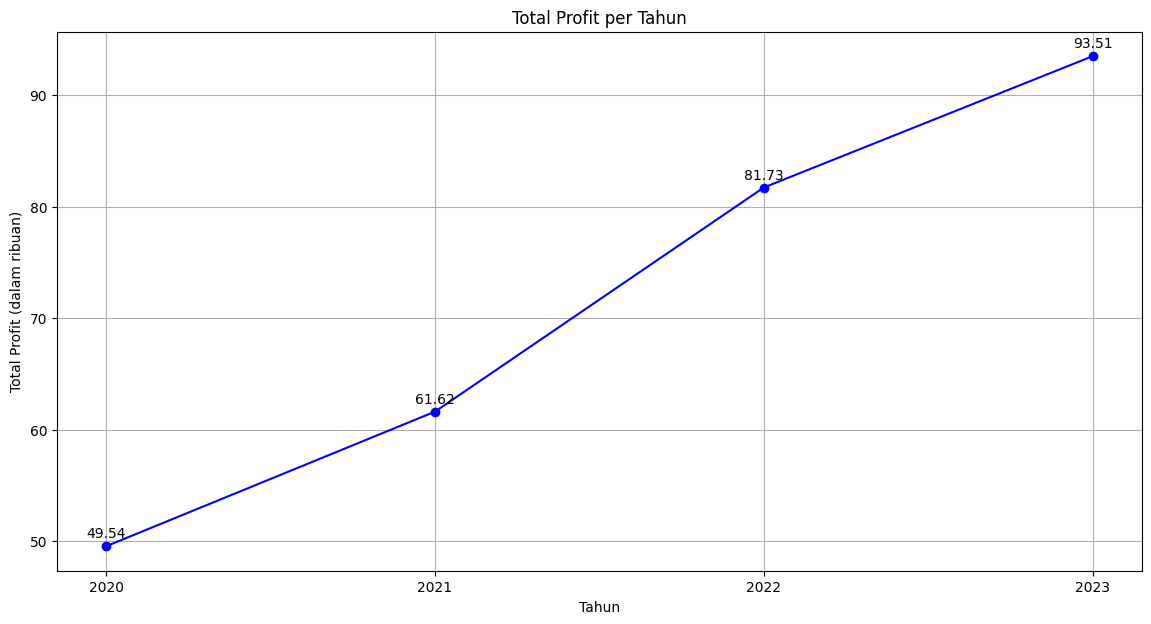

In [346]:
# Mengubah kolom Order Date menjadi tipe data datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')

# Menambahkan kolom tahun
df['Year'] = df['Order Date'].dt.year

# Mengelompokkan data berdasarkan tahun dan menghitung total profit
yearly_profit = df.groupby('Year')['Profit'].sum().reset_index()

# Mengubah nilai profit menjadi ribuan
yearly_profit['Profit'] = yearly_profit['Profit'] / 1000

# Mengatur tema seaborn menjadi blues
sns.set_palette("Blues")

# Membuat line plot
plt.figure(figsize=(14, 7))
plt.plot(yearly_profit['Year'], yearly_profit['Profit'], marker='o', color='blue')
plt.xlabel('Tahun')
plt.ylabel('Total Profit (dalam ribuan)')
plt.title('Total Profit per Tahun')
plt.grid(True)
plt.xticks(yearly_profit['Year'])

# Menampilkan nilai profit di atas setiap titik
for i, txt in enumerate(yearly_profit['Profit']):
    plt.text(yearly_profit['Year'][i], txt + 0.5, f'{round(txt, 2)}', ha='center', va='bottom', color='black')

plt.show()


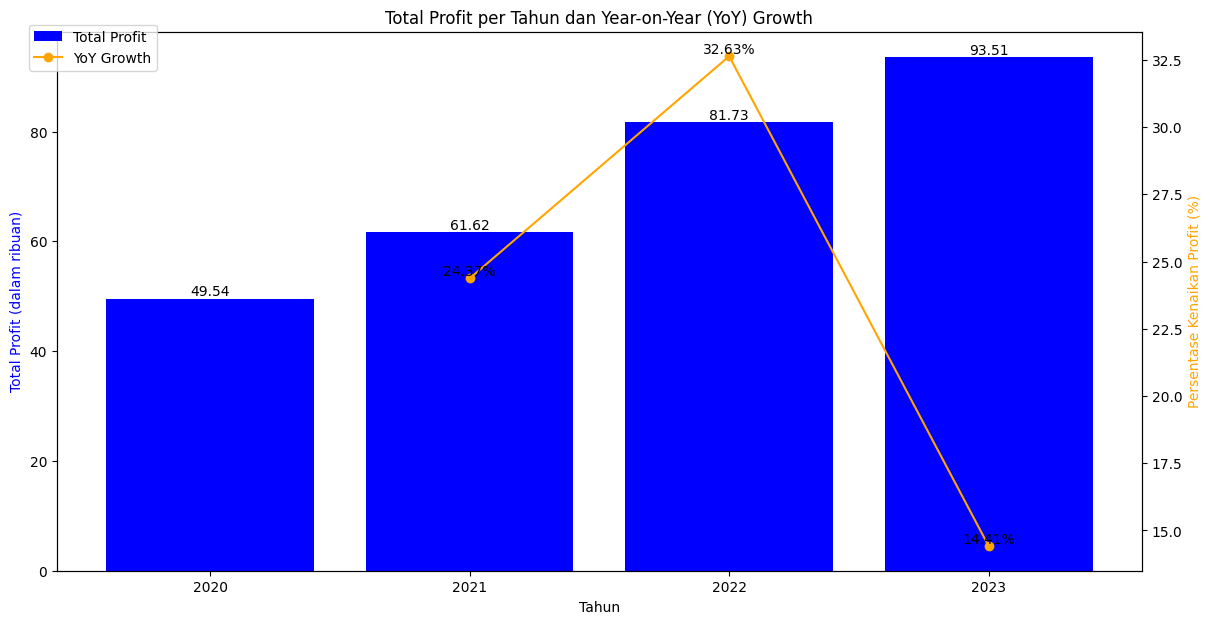

In [347]:
# Mengubah kolom Order Date menjadi tipe data datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')

# Menambahkan kolom tahun
df['Year'] = df['Order Date'].dt.year

# Mengelompokkan data berdasarkan tahun dan menghitung total profit
yearly_profit = df.groupby('Year')['Profit'].sum().reset_index()

# Menghitung persentase kenaikan profit dari tahun ke tahun
yearly_profit['YoY Growth (%)'] = yearly_profit['Profit'].pct_change() * 100

# Mengubah nilai profit menjadi ribuan
yearly_profit['Profit'] = yearly_profit['Profit'] / 1000

# Mengatur tema seaborn menjadi blues
sns.set_palette("Blues")

# Membuat subplot
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar chart untuk total profit per tahun
bars = ax1.bar(yearly_profit['Year'], yearly_profit['Profit'], color='blue', label='Total Profit')
ax1.set_xlabel('Tahun')
ax1.set_ylabel('Total Profit (dalam ribuan)', color='blue')
ax1.set_title('Total Profit per Tahun dan Year-on-Year (YoY) Growth')
ax1.set_xticks(yearly_profit['Year'])

# Menampilkan nilai profit di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black')

# Line chart untuk persentase kenaikan profit
ax2 = ax1.twinx()
ax2.plot(yearly_profit['Year'], yearly_profit['YoY Growth (%)'], color='orange', marker='o', label='YoY Growth')
ax2.set_ylabel('Persentase Kenaikan Profit (%)', color='orange')

# Menampilkan nilai persentase kenaikan di atas setiap titik
for i, txt in enumerate(yearly_profit['YoY Growth (%)'][1:]):
    ax2.text(yearly_profit['Year'][i+1], txt, f'{round(txt, 2)}%', ha='center', va='bottom', color='black')

# Menambahkan legenda
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

plt.show()


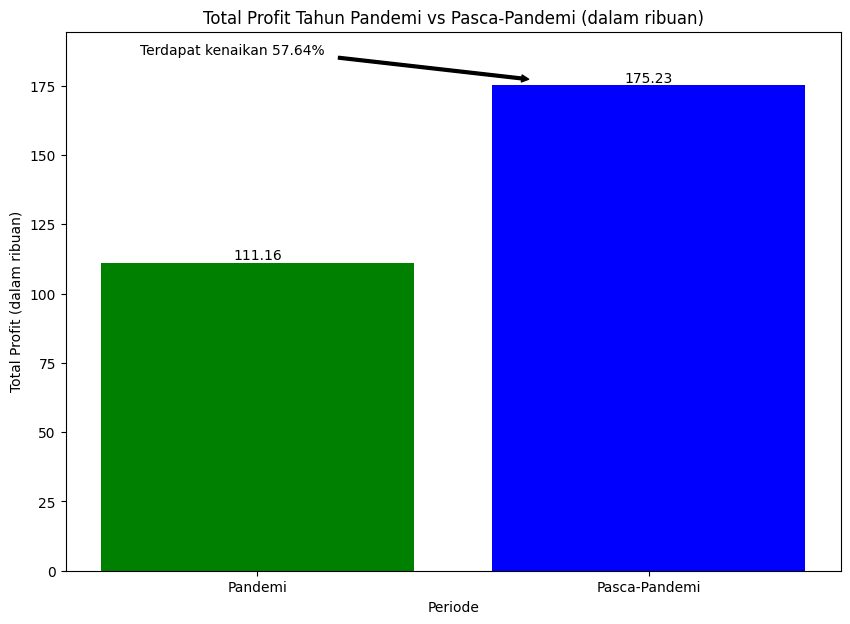

In [360]:
# Menghitung total profit untuk tahun pandemi
pandemic_profit = df[df['Periode'] == 'Pandemi']['Profit'].sum() / 1000

# Menghitung total profit untuk tahun pasca-pandemi
post_pandemic_profit = df[df['Periode'] == 'Pasca-Pandemi']['Profit'].sum() / 1000

# Menghitung persentase kenaikan profit dari pandemi ke pasca-pandemi
profit_increase_percentage = ((post_pandemic_profit - pandemic_profit) / pandemic_profit) * 100

# Membuat dataframe untuk visualisasi
profit_data = pd.DataFrame({
    'Periode': ['Pandemi', 'Pasca-Pandemi'],
    'Total Profit (dalam ribuan)': [pandemic_profit, post_pandemic_profit]
})

# Membuat bar chart
plt.figure(figsize=(10, 7))
bars = plt.bar(profit_data['Periode'], profit_data['Total Profit (dalam ribuan)'], color=['green', 'blue'])

# Menampilkan nilai profit di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Menambahkan teks yang menunjukkan persentase kenaikan profit
plt.text(-0.3, post_pandemic_profit + 10, f'Terdapat kenaikan {round(profit_increase_percentage, 2)}%', ha='left', va='bottom', color='black')

# Menambahkan panah yang mengarah ke bar chart
arrow = patches.FancyArrowPatch((0.2, post_pandemic_profit + 10), (0.7, post_pandemic_profit + 2), mutation_scale=10, color='black')
plt.gca().add_patch(arrow)

plt.xlabel('Periode')
plt.ylabel('Total Profit (dalam ribuan)')
plt.title('Total Profit Tahun Pandemi vs Pasca-Pandemi (dalam ribuan)')
plt.show()


## Insight
Setelah dilakukan analisis, terlihat bahwa tren profit perusahaan mengalami kenaikan setiap tahunnya. Terdapat perbedaan signifikan dalam profitabilitas antara tahun pandemi COVID-19 (2020–2021) dan pasca-pandemi (2022–2023). Selama periode pandemi, profitabilitas yang didapatkan perusahaan lebih rendah dibandingkan dengan periode pasca-pandemi. Profit yang didapatkan pada periode pasca-pandemi menunjukkan peningkatan yang signifikan sebesar 57,64% dibandingkan dengan periode pandemi dan sebelum pandemi.

### Analysis Pola Industry dan Profit Saat Pandemi dan Setelah Pandemi 

In [356]:
# Menghitung total profit dan persentase profit untuk setiap industri selama periode pandemi
pandemic_df = df[df['Periode'] == 'Pandemi']
pandemic_profit_percent = pandemic_df.groupby("Industry")[["Profit"]].sum()
total_pandemic_profit = pandemic_profit_percent["Profit"].sum()
pandemic_profit_percent["Profit_Percentage"] = (pandemic_profit_percent["Profit"] / total_pandemic_profit) * 100

# Menghitung total profit dan persentase profit untuk setiap industri selama periode pasca-pandemi
post_pandemic_df = df[df['Periode'] == 'Pasca-Pandemi']
post_pandemic_profit_percent = post_pandemic_df.groupby("Industry")[["Profit"]].sum()
total_post_pandemic_profit = post_pandemic_profit_percent["Profit"].sum()
post_pandemic_profit_percent["Profit_Percentage"] = (post_pandemic_profit_percent["Profit"] / total_post_pandemic_profit) * 100

# Menghitung persentase kenaikan profit
increase_percent = (post_pandemic_profit_percent["Profit"] - pandemic_profit_percent["Profit"]) / pandemic_profit_percent["Profit"] * 100

# Menambahkan kolom persentase kenaikan profit
post_pandemic_profit_percent["Increase_Percentage"] = increase_percent.round(2)

# Membulatkan ke dua tempat desimal
pandemic_profit_percent["Profit_Percentage"] = pandemic_profit_percent["Profit_Percentage"].round(2)
post_pandemic_profit_percent["Profit_Percentage"] = post_pandemic_profit_percent["Profit_Percentage"].round(2)

# Format kolom Profit supaya memiliki separator ribuan dan dua tempat desimal
pandemic_profit_percent["Profit"] = pandemic_profit_percent["Profit"].map('{:,.2f}'.format)
post_pandemic_profit_percent["Profit"] = post_pandemic_profit_percent["Profit"].map('{:,.2f}'.format)

# Menyortir berdasarkan persentase profit dalam urutan menurun
pandemic_profit_percent = pandemic_profit_percent.sort_values("Profit_Percentage", ascending=False)
post_pandemic_profit_percent = post_pandemic_profit_percent.sort_values("Profit_Percentage", ascending=False)

# Menampilkan hasil dalam bentuk dataframe
pandemic_profit_percent_df = pandemic_profit_percent.reset_index()
post_pandemic_profit_percent_df = post_pandemic_profit_percent.reset_index()

# Menampilkan dataframes
print("Profit dan Persentase Profit Selama Pandemi:")
display(pandemic_profit_percent_df)
print("\nProfit dan Persentase Profit Selama Pasca-Pandemi:")
display(post_pandemic_profit_percent_df)


Profit dan Persentase Profit Selama Pandemi:


,Industry,Profit,Profit_Percentage
0,Energy,"20,823.24",18.73
1,Finance,"19,036.89",17.13
2,Manufacturing,"18,543.47",16.68
3,Healthcare,"15,218.52",13.69
4,Retail,"9,816.77",8.83
5,Consumer Products,"8,593.43",7.73
6,Tech,"7,125.09",6.41
7,Communications,"7,094.13",6.38
8,Transportation,"2,621.07",2.36
9,Misc,"2,289.99",2.06



Profit dan Persentase Profit Selama Pasca-Pandemi:


,Industry,Profit,Profit_Percentage,Increase_Percentage
0,Finance,"31,312.08",17.87,64.48
1,Consumer Products,"28,424.58",16.22,230.77
2,Energy,"24,459.07",13.96,17.46
3,Retail,"20,391.06",11.64,107.72
4,Manufacturing,"19,869.64",11.34,7.15
5,Tech,"17,489.95",9.98,145.47
6,Healthcare,"16,750.57",9.56,10.07
7,Communications,"6,882.22",3.93,-2.99
8,Misc,"4,873.64",2.78,112.82
9,Transportation,"4,781.63",2.73,82.43


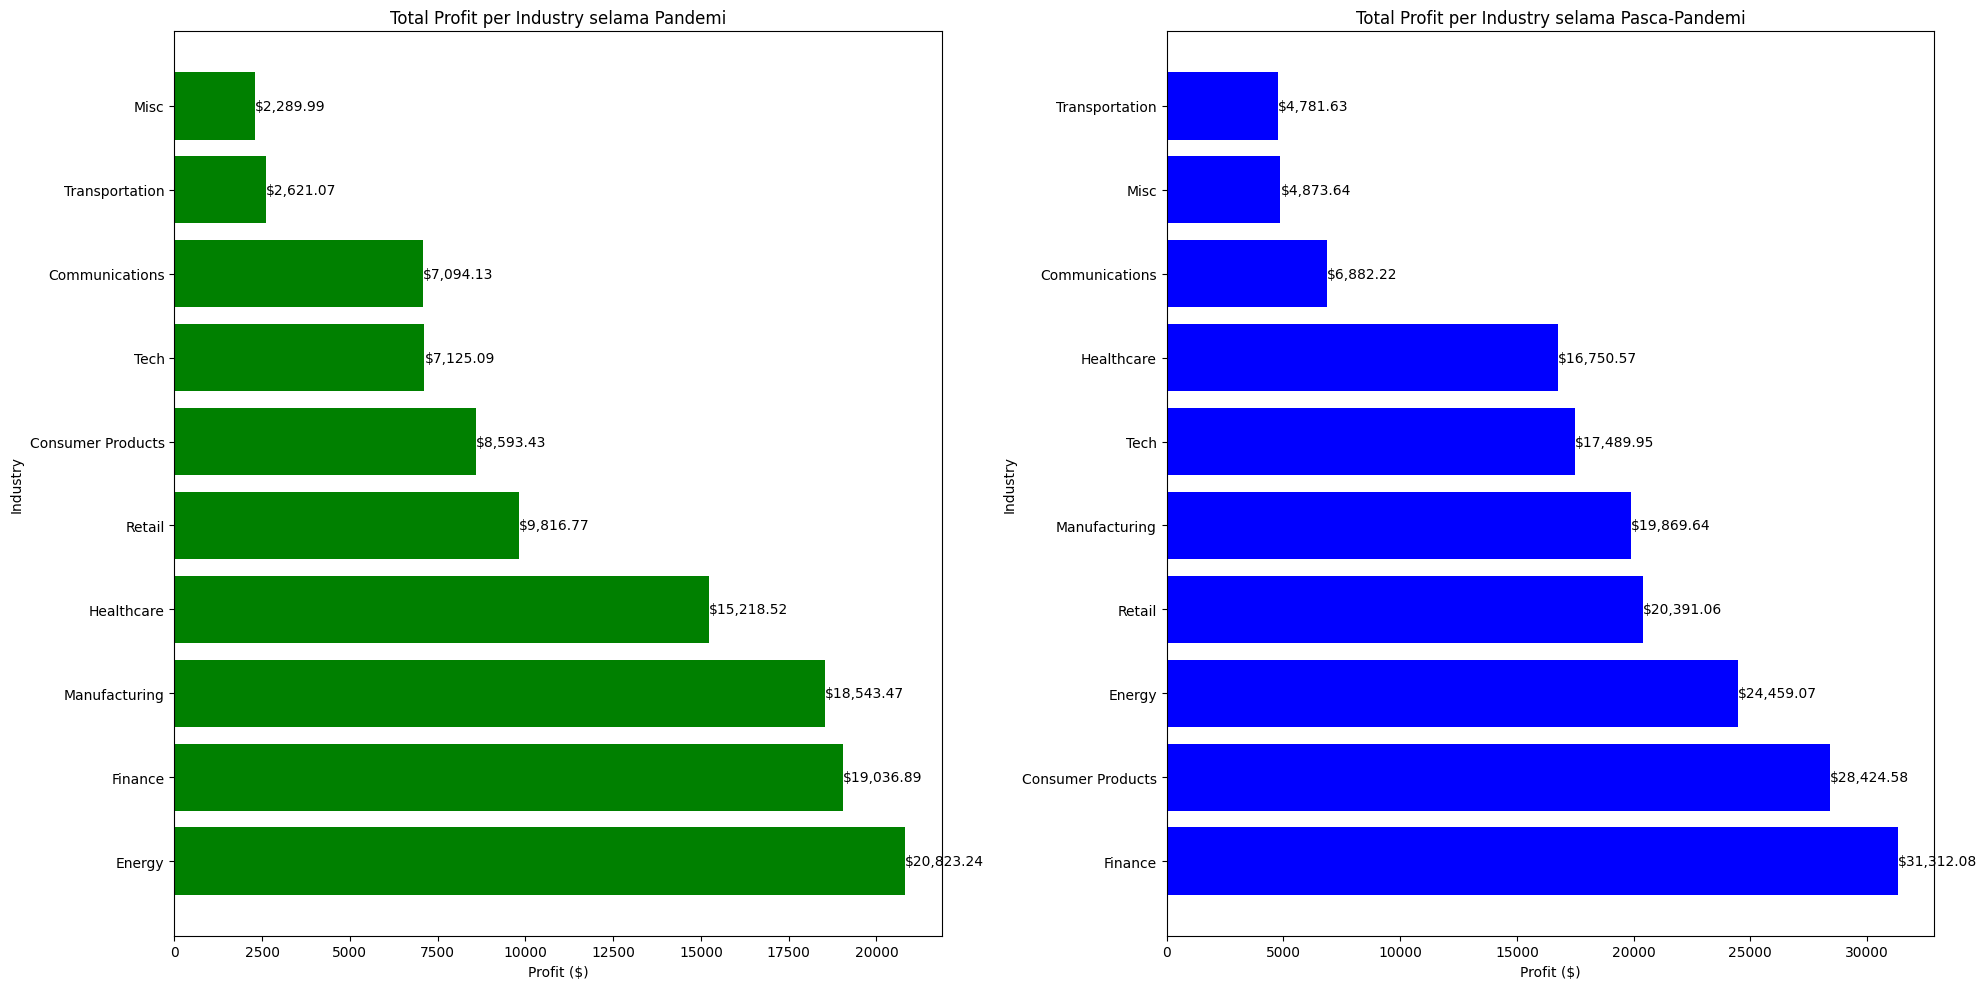

In [309]:
# Menghitung total profit untuk setiap industry selama periode pandemi
pandemic_df = df[df['Periode'] == 'Pandemi']
pandemic_profit = pandemic_df.groupby("Industry")[["Profit"]].sum().sort_values(by="Profit", ascending=False)

# Menghitung total profit untuk setiap industry selama periode pasca-pandemi
post_pandemic_df = df[df['Periode'] == 'Pasca-Pandemi']
post_pandemic_profit = post_pandemic_df.groupby("Industry")[["Profit"]].sum().sort_values(by="Profit", ascending=False)

# Menampilkan hasil dalam bentuk dataframe
pandemic_profit_df = pandemic_profit.reset_index()
post_pandemic_profit_df = post_pandemic_profit.reset_index()

# Membuat subplot untuk periode pandemi dan pasca-pandemi
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Barplot horizontal untuk periode pandemi
axes[0].barh(pandemic_profit_df['Industry'], pandemic_profit['Profit'], color='green')
axes[0].set_xlabel('Profit ($)')
axes[0].set_ylabel('Industry')
axes[0].set_title('Total Profit per Industry selama Pandemi')

# Menampilkan nilai profit di atas setiap bar
for index, value in enumerate(pandemic_profit['Profit']):
    axes[0].text(value, index, f'${value:,.2f}', ha='left', va='center', color='black')

# Barplot horizontal untuk periode pasca-pandemi
axes[1].barh(post_pandemic_profit_df['Industry'], post_pandemic_profit['Profit'], color='blue')
axes[1].set_xlabel('Profit ($)')
axes[1].set_ylabel('Industry')
axes[1].set_title('Total Profit per Industry selama Pasca-Pandemi')

# Menampilkan nilai profit di atas setiap bar
for index, value in enumerate(post_pandemic_profit['Profit']):
    axes[1].text(value, index, f'${value:,.2f}', ha='left', va='center', color='black')

plt.tight_layout()
plt.show()


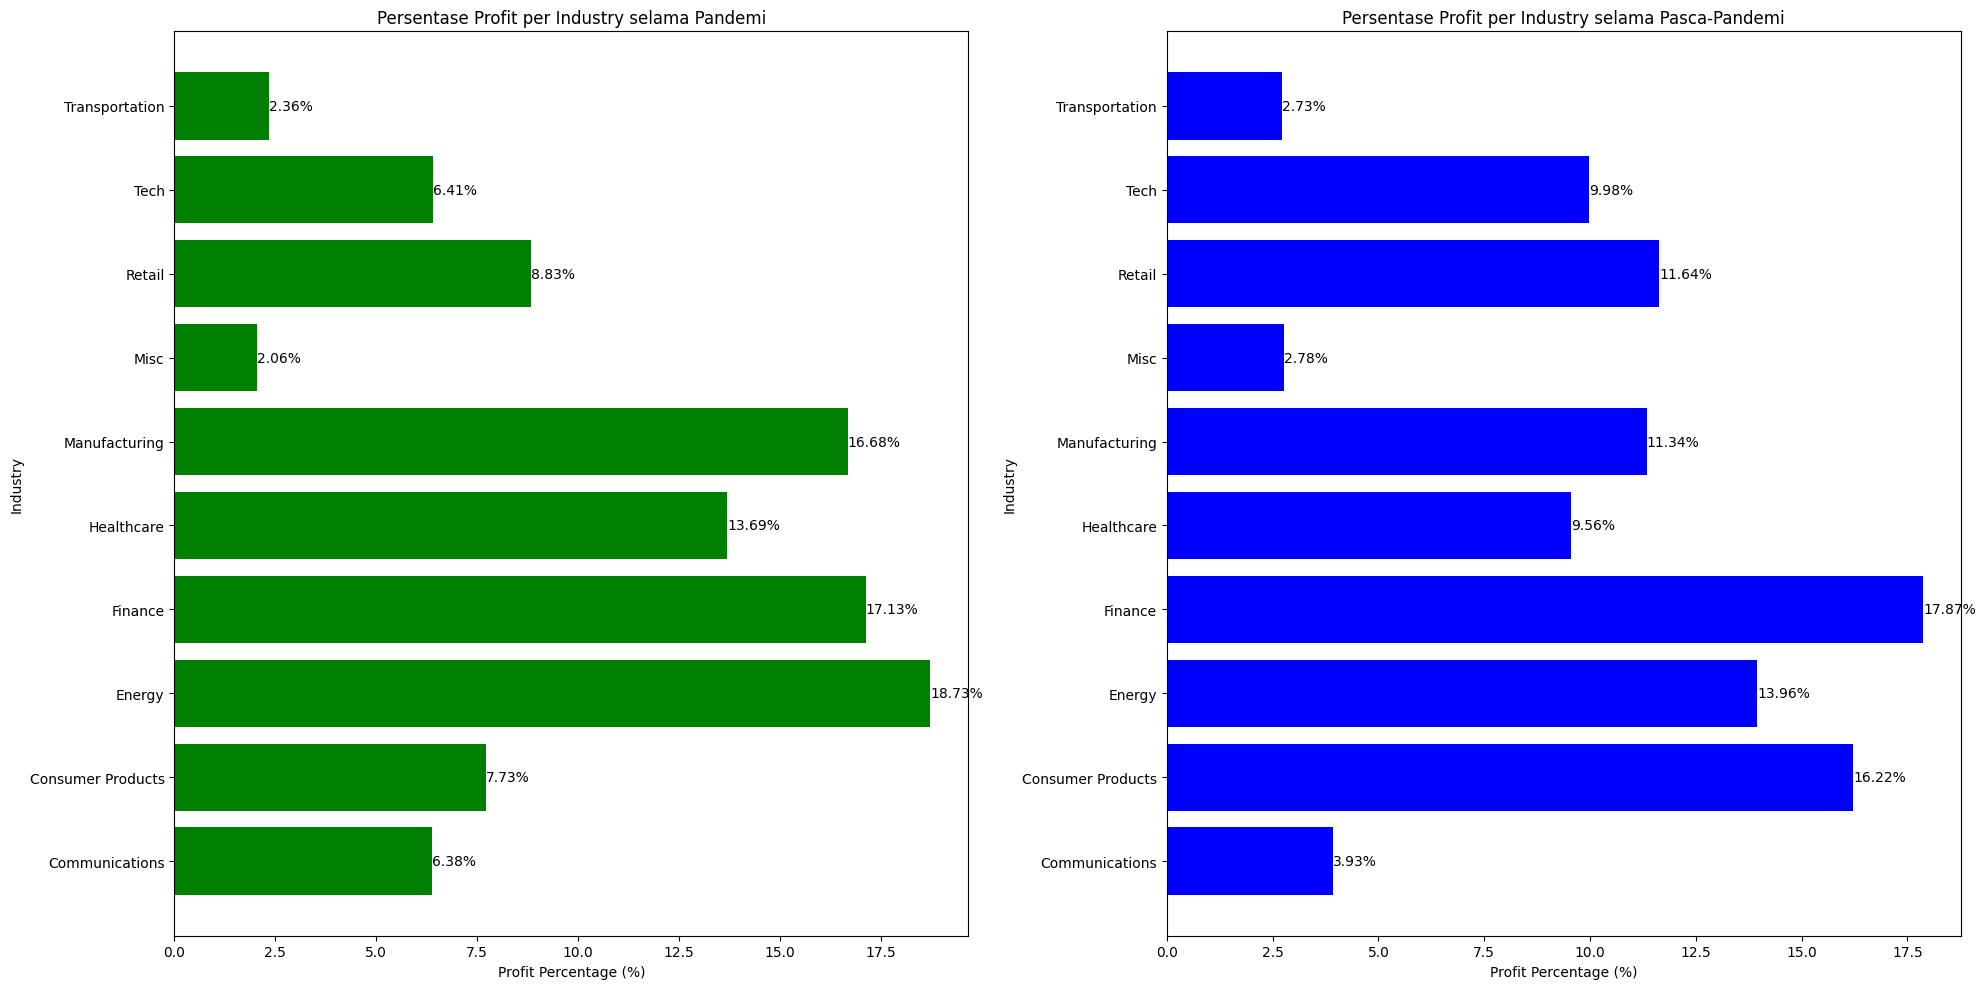

In [ ]:
# Menghitung total profit dan persentase profit untuk setiap industry selama periode pandemi
pandemic_df = df[df['Periode'] == 'Pandemi']
pandemic_profit_percent = pandemic_df.groupby("Industry")[["Profit"]].sum()
total_pandemic_profit = pandemic_profit_percent["Profit"].sum()
pandemic_profit_percent["Profit_Percentage"] = (pandemic_profit_percent["Profit"] / total_pandemic_profit) * 100

# Menghitung total profit dan persentase profit untuk setiap industry selama periode pasca-pandemi
post_pandemic_df = df[df['Periode'] == 'Pasca-Pandemi']
post_pandemic_profit_percent = post_pandemic_df.groupby("Industry")[["Profit"]].sum()
total_post_pandemic_profit = post_pandemic_profit_percent["Profit"].sum()
post_pandemic_profit_percent["Profit_Percentage"] = (post_pandemic_profit_percent["Profit"] / total_post_pandemic_profit) * 100

# Menampilkan hasil dalam bentuk dataframe
pandemic_profit_percent_df = pandemic_profit_percent.reset_index()
post_pandemic_profit_percent_df = post_pandemic_profit_percent.reset_index()

# Membuat subplot untuk periode pandemi dan pasca-pandemi
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Bar chart horizontal untuk periode pandemi
axes[0].barh(pandemic_profit_percent_df['Industry'], pandemic_profit_percent_df['Profit_Percentage'], color='green')
axes[0].set_ylabel('Industry')
axes[0].set_xlabel('Profit Percentage (%)')
axes[0].set_title('Persentase Profit per Industry selama Pandemi')

# Menampilkan nilai persentase di atas setiap bar
for index, value in enumerate(pandemic_profit_percent_df['Profit_Percentage']):
    axes[0].text(value, index, f'{value:.2f}%', ha='left', va='center', color='black')

# Bar chart horizontal untuk periode pasca-pandemi
axes[1].barh(post_pandemic_profit_percent_df['Industry'], post_pandemic_profit_percent_df['Profit_Percentage'], color='blue')
axes[1].set_ylabel('Industry')
axes[1].set_xlabel('Profit Percentage (%)')
axes[1].set_title('Persentase Profit per Industry selama Pasca-Pandemi')

# Menampilkan nilai persentase di atas setiap bar
for index, value in enumerate(post_pandemic_profit_percent_df['Profit_Percentage']):
    axes[1].text(value, index, f'{value:.2f}%', ha='left', va='center', color='black')

plt.tight_layout()
plt.show()


#### Insight Perubahan 
1. **Consumer Products**:
    - **Pandemi**: Profit sebesar $8,593.43 dengan persentase profit 7.73%.
    - **Pasca-Pandemi**: Profit meningkat menjadi $28,424.58 dengan persentase profit 16.22%.
    - **Insight**: Consumer Products mengalami peningkatan profit yang signifikan sebesar $19,831.15 dan persentase profit meningkat sebesar 8.49%. Sektor Consumer Products mengalami kenaikan proporsi yang signifikan, meningkat dari 7.73% selama pandemi menjadi 16.22% setelah pandemi. Ini menunjukkan hampir dua kali lipat peningkatan proporsi profit, mencerminkan tingginya lonjakan permintaan produk konsumen setelah pandemi.

2. **Finance**:
    - **Pandemi**: Profit sebesar $19,036.89 dengan persentase profit 17.13%.
    - **Pasca-Pandemi**: Profit meningkat menjadi $31,312.08 dengan persentase profit 17.87%.
    - **Insight**: Sektor Finance mengalami peningkatan profit yang signifikan dari $19,036.89 selama pandemi menjadi $31,312.08 setelah pandemi. Ini menunjukkan penguatan yang luar biasa dalam sektor keuangan dengan peningkatan profit yang hampir mencapai 1,65 kali lipat. Keberhasilan ini mencerminkan stabilitas dan pertumbuhan dalam industri keuangan selama pemulihan ekonomi.

3. **Tech**:
    - **Pandemi**: Profit sebesar $7,125.09 dengan persentase profit 6.41%.
    - **Pasca-Pandemi**: Profit meningkat menjadi $17,489.95 dengan persentase profit 9.98%.
    - **Insight**: Sektor Tech menunjukkan peningkatan profit yang signifikan sebesar $10,364.86 dan persentase profit meningkat sebesar 3.57%. Profit hampir dua kali lipat di industri Tech dari $7,125.09 selama pandemi menjadi $17,489.95 setelah pandemi, mencerminkan tingginya permintaan teknologi pasca-pandemi.

### Uji Hipotesis Profit tiap Industry saat dan setelah pandemi

In [ ]:
# Group data by Industry and Periode
industries = df['Industry'].unique()

# Loop melalui setiap industry
for industry in industries:
    print(f"Industry: {industry}")
    
    # Subset data untuk masing-masing periode
    data_pandemi = df[(df['Industry'] == industry) & (df['Periode'] == 'Pandemi')]['Profit']
    data_pasca_pandemi = df[(df['Industry'] == industry) & (df['Periode'] == 'Pasca-Pandemi')]['Profit']
    
    # Uji normalitas
    normal_pandemi = stats.shapiro(data_pandemi).pvalue > 0.1
    normal_pasca_pandemi = stats.shapiro(data_pasca_pandemi).pvalue > 0.1
    
    if normal_pandemi and normal_pasca_pandemi:
        # Jika data normal, gunakan t-test
        stat, p_value = stats.ttest_ind(data_pandemi, data_pasca_pandemi)
        test_type = "T-test"
    else:
        # Jika data tidak normal, gunakan Mann-Whitney U test
        stat, p_value = stats.mannwhitneyu(data_pandemi, data_pasca_pandemi)
        test_type = "Mann-Whitney U test"
    
    # Hasil
    print(f"  Test Type: {test_type}")
    print(f"  Statistic: {stat:.4f}, P-value: {p_value:.4f}")
    if p_value < 0.1:
        print("  Kesimpulan: Ada perbedaan signifikan.")
    else:
        print("  Kesimpulan: Tidak ada perbedaan signifikan.")
    print("-"*50)


In [389]:
from scipy.stats import chi2_contingency

# Menghitung total profit dan persentase profit untuk setiap industri selama periode pandemi
pandemic_df = df[df['Periode'] == 'Pandemi']
pandemic_profit_percent = pandemic_df.groupby("Industry")[["Profit"]].sum()
total_pandemic_profit = pandemic_profit_percent["Profit"].sum()
pandemic_profit_percent["Profit_Percentage"] = (pandemic_profit_percent["Profit"] / total_pandemic_profit) * 100

# Menghitung total profit dan persentase profit untuk setiap industri selama periode pasca-pandemi
post_pandemic_df = df[df['Periode'] == 'Pasca-Pandemi']
post_pandemic_profit_percent = post_pandemic_df.groupby("Industry")[["Profit"]].sum()
total_post_pandemic_profit = post_pandemic_profit_percent["Profit"].sum()
post_pandemic_profit_percent["Profit_Percentage"] = (post_pandemic_profit_percent["Profit"] / total_post_pandemic_profit) * 100

# Membuat DataFrame dari persentase profit
pandemic_profit_percent_df = pandemic_profit_percent.reset_index()
post_pandemic_profit_percent_df = post_pandemic_profit_percent.reset_index()

# Menyusun tabel kontingensi
contingency_table = pd.DataFrame({
    'Pandemi': pandemic_profit_percent["Profit_Percentage"],
    'Pasca_Pandemi': post_pandemic_profit_percent["Profit_Percentage"]
})

# Mengambil nilai test chi-squared
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Menampilkan hasil
print(f"Chi-Squared Statistic: {chi2_stat:.4f}")
print(f"P-Value: {p_val:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Significant Difference" if p_val < 0.05 else "No Significant Difference")


Chi-Squared Statistic: 7.3570
P-Value: 0.6000
Degrees of Freedom: 9
No Significant Difference


### insight Akhir Pola Profit pandemi dan pasca pandemi untuk setiap industry

Analisis proporsi profit selama dan setelah pandemi tiap kategori produk terdepat beberapa perbedaan signifikan pada profitnya. **Consumer Products** mencatat peningkatan profit dari $8,593.43 selama pandemi, menjadi $28,424.58 setelah pandemi hal ini adalah merupakan peningkata sebesar 230.77%.  **Finance** juga mengalami peningkatan profit dari $19,036.89 selama pandemi , menjadi $31,312.08 setelah pandemi hal ini adalah peningkatan sebesar 64.48%. Kategori Tech menunjukkan peningkatan profit dari $7,125.09 selama pandemi dengan persentase profit 6.41%, menjadi $17,489.95 setelah pandemi dengan persentase profit 9.98%.

Selain itu, proporsi profit secara keseluruhan tidak berubah signifikan, kategori tertentu menunjukkan profit yang berbeda secara signifikan selama pandemi dan pasca-pandemi.

### Analysis Pola Region dan Profit Saat Pandemi dan Setelah Pandemi 

In [355]:
# Menghitung total profit dan persentase profit untuk setiap region selama periode pandemi
pandemic_df = df[df['Periode'] == 'Pandemi']
pandemic_profit_percent = pandemic_df.groupby("Region")[["Profit"]].sum()
total_pandemic_profit = pandemic_profit_percent["Profit"].sum()
pandemic_profit_percent["Profit_Percentage"] = (pandemic_profit_percent["Profit"] / total_pandemic_profit) * 100

# Menghitung total profit dan persentase profit untuk setiap region selama periode pasca-pandemi
post_pandemic_df = df[df['Periode'] == 'Pasca-Pandemi']
post_pandemic_profit_percent = post_pandemic_df.groupby("Region")[["Profit"]].sum()
total_post_pandemic_profit = post_pandemic_profit_percent["Profit"].sum()
post_pandemic_profit_percent["Profit_Percentage"] = (post_pandemic_profit_percent["Profit"] / total_post_pandemic_profit) * 100

# Menghitung persentase kenaikan profit
increase_percent = (post_pandemic_profit_percent["Profit"] - pandemic_profit_percent["Profit"]) / pandemic_profit_percent["Profit"] * 100

# Menambahkan kolom persentase kenaikan profit
post_pandemic_profit_percent["Increase_Percentage"] = increase_percent.round(2)

# Membulatkan ke dua tempat desimal
pandemic_profit_percent["Profit_Percentage"] = pandemic_profit_percent["Profit_Percentage"].round(2)
post_pandemic_profit_percent["Profit_Percentage"] = post_pandemic_profit_percent["Profit_Percentage"].round(2)

# Format kolom Profit supaya memiliki separator ribuan dan dua tempat desimal
pandemic_profit_percent["Profit"] = pandemic_profit_percent["Profit"].map('{:,.2f}'.format)
post_pandemic_profit_percent["Profit"] = post_pandemic_profit_percent["Profit"].map('{:,.2f}'.format)

# Menyortir berdasarkan persentase profit dalam urutan menurun
pandemic_profit_percent = pandemic_profit_percent.sort_values("Profit_Percentage", ascending=False)
post_pandemic_profit_percent = post_pandemic_profit_percent.sort_values("Profit_Percentage", ascending=False)

# Menampilkan hasil dalam bentuk dataframe
pandemic_profit_percent_df = pandemic_profit_percent.reset_index()
post_pandemic_profit_percent_df = post_pandemic_profit_percent.reset_index()

# Menampilkan dataframes
print("Profit dan Persentase Profit Selama Pandemi:")
display(pandemic_profit_percent_df)
print("\nProfit dan Persentase Profit Selama Pasca-Pandemi:")
display(post_pandemic_profit_percent_df)


Profit dan Persentase Profit Selama Pandemi:


,Region,Profit,Profit_Percentage
0,EMEA,"68,648.20",61.75
1,AMER,"41,781.11",37.59
2,APJ,733.26,0.66



Profit dan Persentase Profit Selama Pasca-Pandemi:


,Region,Profit,Profit_Percentage,Increase_Percentage
0,AMER,"85,645.88",48.88,104.99
1,EMEA,"78,807.84",44.97,14.80
2,APJ,"10,780.73",6.15,1370.25


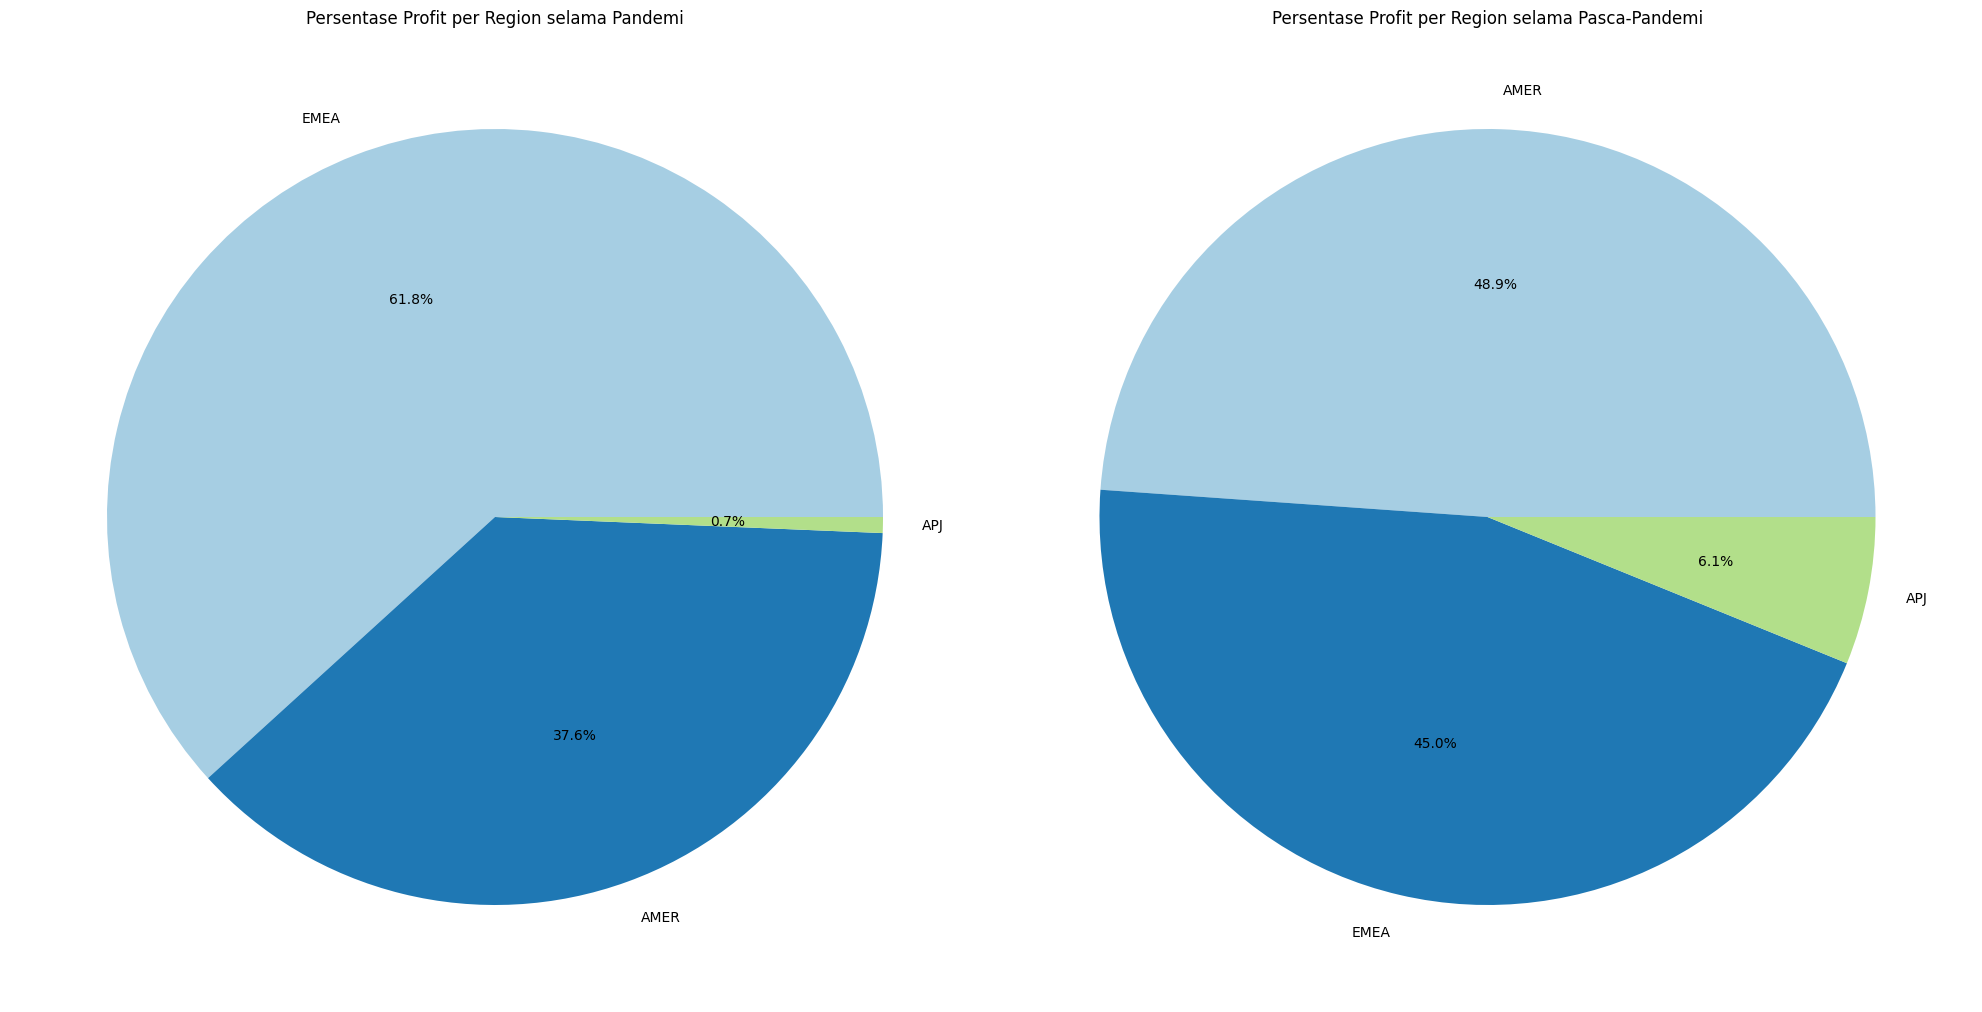

In [294]:
# Menghitung total profit dan persentase profit untuk setiap region selama periode pandemi
pandemic_df = df[df['Periode'] == 'Pandemi']
pandemic_profit_percent = pandemic_df.groupby("Region")[["Profit"]].sum()
total_pandemic_profit = pandemic_profit_percent["Profit"].sum()
pandemic_profit_percent["Profit_Percentage"] = (pandemic_profit_percent["Profit"] / total_pandemic_profit) * 100
pandemic_profit_percent["Profit_Percentage"] = pandemic_profit_percent["Profit_Percentage"].round(2)
pandemic_profit_percent["Profit"] = pandemic_profit_percent["Profit"].map('{:,.2f}'.format)
pandemic_profit_percent = pandemic_profit_percent.sort_values("Profit_Percentage", ascending=False)

# Menghitung total profit dan persentase profit untuk setiap region selama periode pasca-pandemi
post_pandemic_df = df[df['Periode'] == 'Pasca-Pandemi']
post_pandemic_profit_percent = post_pandemic_df.groupby("Region")[["Profit"]].sum()
total_post_pandemic_profit = post_pandemic_profit_percent["Profit"].sum()
post_pandemic_profit_percent["Profit_Percentage"] = (post_pandemic_profit_percent["Profit"] / total_post_pandemic_profit) * 100
post_pandemic_profit_percent["Profit_Percentage"] = post_pandemic_profit_percent["Profit_Percentage"].round(2)
post_pandemic_profit_percent["Profit"] = post_pandemic_profit_percent["Profit"].map('{:,.2f}'.format)
post_pandemic_profit_percent = post_pandemic_profit_percent.sort_values("Profit_Percentage", ascending=False)

# Membuat subplot untuk periode pandemi dan pasca-pandemi
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Pie chart untuk periode pandemi
axes[0].pie(pandemic_profit_percent['Profit_Percentage'], labels=pandemic_profit_percent.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
axes[0].set_title('Persentase Profit per Region selama Pandemi')

# Pie chart untuk periode pasca-pandemi
axes[1].pie(post_pandemic_profit_percent['Profit_Percentage'], labels=post_pandemic_profit_percent.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
axes[1].set_title('Persentase Profit per Region selama Pasca-Pandemi')

plt.tight_layout()
plt.show()


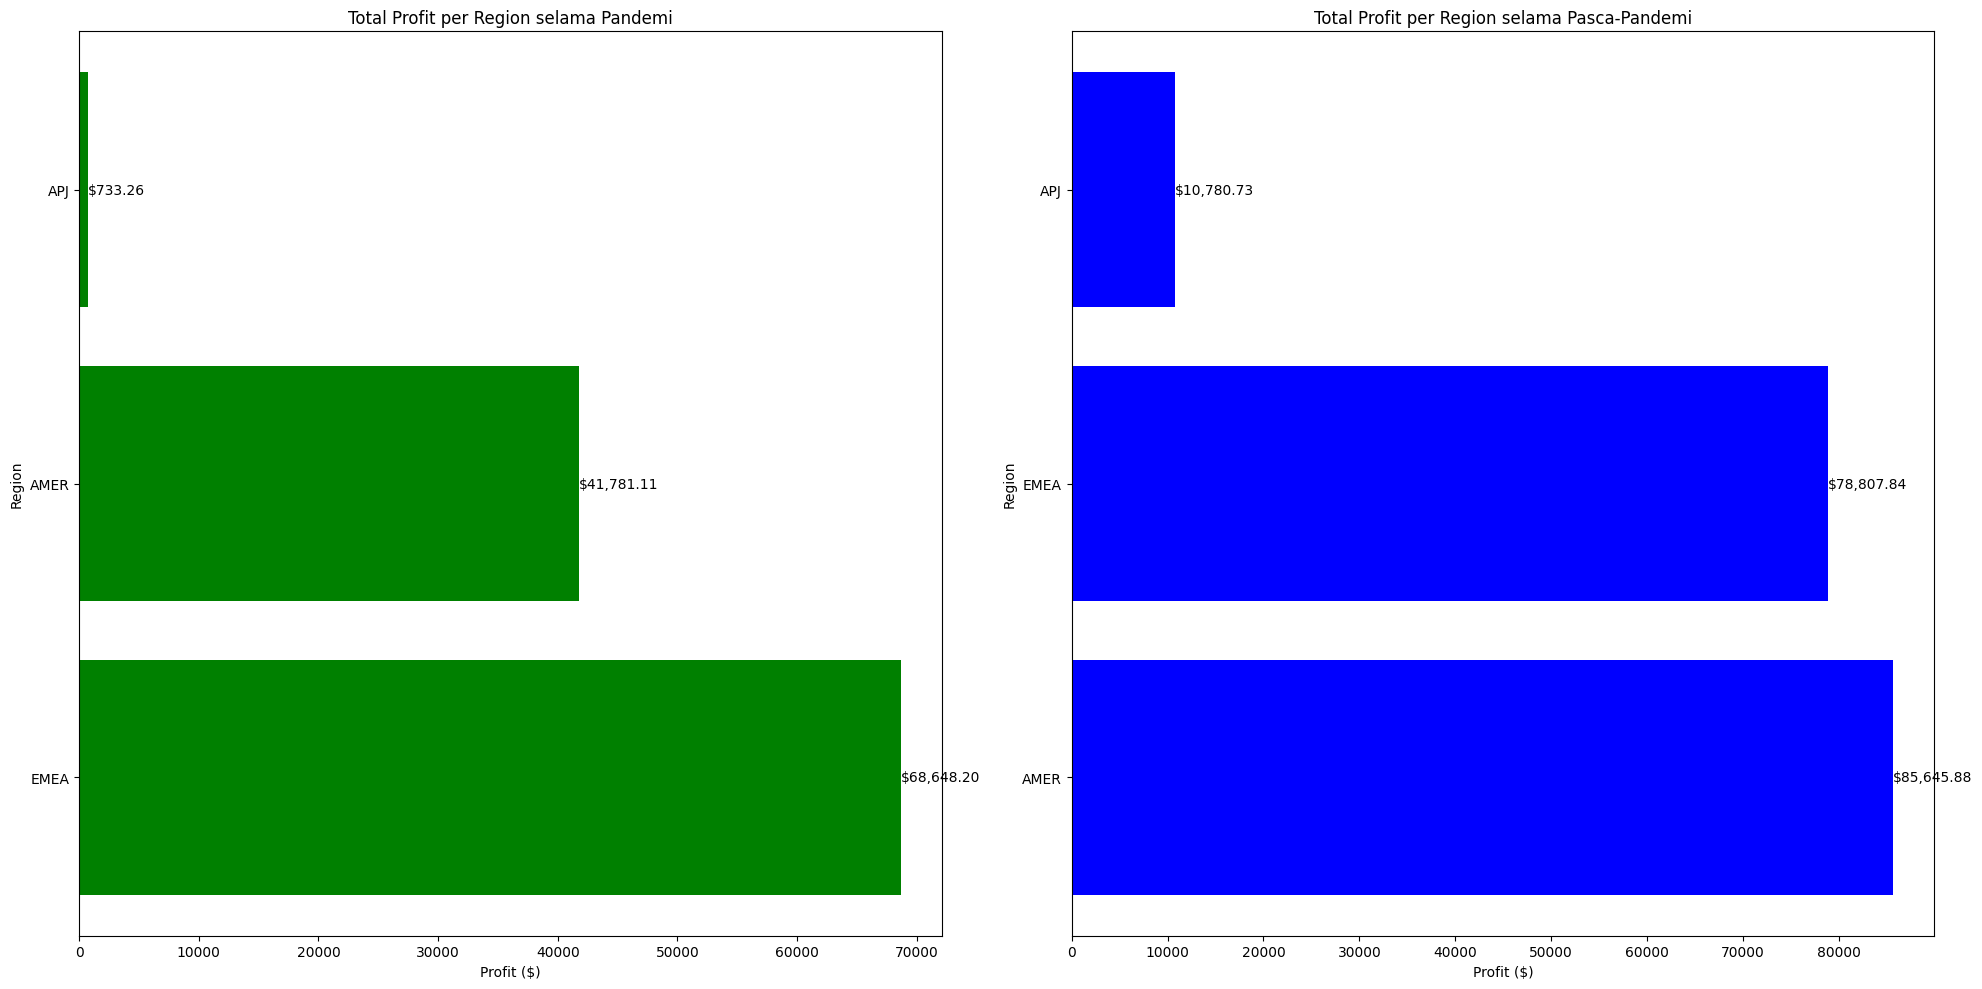

In [297]:
import matplotlib.pyplot as plt

# Menghitung total profit untuk setiap region selama periode pandemi
pandemic_df = df[df['Periode'] == 'Pandemi']
pandemic_profit = pandemic_df.groupby("Region")[["Profit"]].sum().sort_values(by="Profit", ascending=False)

# Menghitung total profit untuk setiap region selama periode pasca-pandemi
post_pandemic_df = df[df['Periode'] == 'Pasca-Pandemi']
post_pandemic_profit = post_pandemic_df.groupby("Region")[["Profit"]].sum().sort_values(by="Profit", ascending=False)

# Menampilkan hasil dalam bentuk dataframe
pandemic_profit_df = pandemic_profit.reset_index()
post_pandemic_profit_df = post_pandemic_profit.reset_index()

# Membuat subplot untuk periode pandemi dan pasca-pandemi
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Barplot horizontal untuk periode pandemi
axes[0].barh(pandemic_profit_df['Region'], pandemic_profit['Profit'], color='green')
axes[0].set_xlabel('Profit ($)')
axes[0].set_ylabel('Region')
axes[0].set_title('Total Profit per Region selama Pandemi')

# Menampilkan nilai profit di atas setiap bar
for index, value in enumerate(pandemic_profit['Profit']):
    axes[0].text(value, index, f'${value:,.2f}', ha='left', va='center', color='black')

# Barplot horizontal untuk periode pasca-pandemi
axes[1].barh(post_pandemic_profit_df['Region'], post_pandemic_profit['Profit'], color='blue')
axes[1].set_xlabel('Profit ($)')
axes[1].set_ylabel('Region')
axes[1].set_title('Total Profit per Region selama Pasca-Pandemi')

# Menampilkan nilai profit di atas setiap bar
for index, value in enumerate(post_pandemic_profit['Profit']):
    axes[1].text(value, index, f'${value:,.2f}', ha='left', va='center', color='black')

plt.tight_layout()
plt.show()


#### Insight Perubahan 

1. **Region APJ**:
    - **Pandemi**: Profit sebesar $733.26 dengan persentase profit 0.66%.
    - **Pasca-Pandemi**: Profit meningkat menjadi $10,780.73 dengan persentase profit 6.15%.
    - **Insight**: Region APJ mengalami peningkatan profit yang sangat signifikan sebesar $10,047.47 dan persentase profit meningkat sebesar 5.49%. APJ mengalami lonjakan luar biasa dalam profit, menunjukkan kebangkitan pasar yang kuat di region ini setelah pandemi.

2. **Region AMER**:
    - **Pandemi**: Profit sebesar $41,781.11 dengan persentase profit 37.59%.
    - **Pasca-Pandemi**: Profit meningkat menjadi $85,645.88 dengan persentase profit 48.88%.
    - **Insight**: Sektor Finance mengalami peningkatan profit yang signifikan dari $41,781.11 selama pandemi menjadi $85,645.88 setelah pandemi. Ini menunjukkan penguatan luar biasa dalam sektor AMER dengan peningkatan profit yang hampir mencapai 2.05 kali lipat. Keberhasilan ini mencerminkan stabilitas dan pertumbuhan dalam industri di AMER selama pemulihan ekonomi.

3. **Region EMEA**:
    - **Pandemi**: Profit sebesar $68,648.20 dengan persentase profit 61.75%.
    - **Pasca-Pandemi**: Profit meningkat mencapai $78,807.84 dengan persentase profit 44.97%.
    - **Insight**: Region EMEA mengalami peningkatan profit sebesar $10,159.64, namun persentase profit turun sebesar 16.78%. Ini menunjukkan bahwa, meskipun ada peningkatan profit nominal, kontribusi EMEA terhadap total profit menurun, mengindikasikan bahwa pertumbuhannya tidak secepat AMER dan APJ.

Dari data di atas, **Region APJ** menunjukkan perubahan terbesar dengan peningkatan profit yang sangat signifikan setelah pandemi. Produk ini mengalami peningkatan profit sebesar $10,047.47. atau mengalami peningkata sebanyak 1370% dibanding saat pandemi


### Uji Hipotesis Profit tiap Region saat dan setelah pandemi

In [370]:
from scipy.stats import chi2_contingency

# Data proporsi selama pandemi
pandemi_proporsi = {
    'Region': ['EMEA', 'AMER', 'APJ'],
    'Profit_Percentage': [61.75, 37.59, 0.66]
}

# Data proporsi pasca-pandemi
pasca_pandemi_proporsi = {
    'Region': ['EMEA', 'AMER', 'APJ'],
    'Profit_Percentage': [44.97, 48.88, 6.15]
}

# Membuat DataFrame
df_pandemi = pd.DataFrame(pandemi_proporsi)
df_pasca_pandemi = pd.DataFrame(pasca_pandemi_proporsi)

# Data contingency table
contingency_table = pd.DataFrame({
    'Pandemi': df_pandemi['Profit_Percentage'],
    'Pasca_Pandemi': df_pasca_pandemi['Profit_Percentage']
})

# Uji chi-squared
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Squared Statistic: {chi2_stat:.4f}")
print(f"P-Value: {p_val:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Significant Difference" if p_val < 0.05 else "No Significant Difference")


Chi-Squared Statistic: 8.5383
P-Value: 0.0140
Degrees of Freedom: 2
Significant Difference


In [ ]:
import scipy.stats as stats

# Group data by Region and Periode
regions = df['Region'].unique()

# Loop melalui setiap region
for region in regions:
    print(f"Region: {region}")
    
    # Subset data untuk masing-masing periode
    data_pandemi = df[(df['Region'] == region) & (df['Periode'] == 'Pandemi')]['Profit']
    data_pasca_pandemi = df[(df['Region'] == region) & (df['Periode'] == 'Pasca-Pandemi')]['Profit']
    
    # Uji normalitas
    normal_pandemi = stats.shapiro(data_pandemi).pvalue > 0.1
    normal_pasca_pandemi = stats.shapiro(data_pasca_pandemi).pvalue > 0.1
    
    if normal_pandemi and normal_pasca_pandemi:
        # Jika data normal, gunakan t-test
        stat, p_value = stats.ttest_ind(data_pandemi, data_pasca_pandemi)
        test_type = "T-test"
    else:
        # Jika data tidak normal, gunakan Mann-Whitney U test
        stat, p_value = stats.mannwhitneyu(data_pandemi, data_pasca_pandemi)
        test_type = "Mann-Whitney U test"
    
    # Hasil
    print(f"  Test Type: {test_type}")
    print(f"  Statistic: {stat:.4f}, P-value: {p_value:.4f}")
    if p_value < 0.1:
        print("  Kesimpulan: Ada perbedaan signifikan.")
    else:
        print("  Kesimpulan: Tidak ada perbedaan signifikan.")


### Insight akhir pola Profit pandemi dan pasca pandemi Tiap region
Berdasarkan analisis proporsi profit untuk tiap region, ditemukan bahwa persentase profit berbeda secara signifikan antara periode pandemi dan pasca-pandemi. Region APJ mengalami peningkatan profit dari $733.26 selama pandemi, menjadi $10,780.73 setelah pandemi d. Region AMER mencatat peningkatan profit dari $41,781.11 selama pandemi dengan persentase profit 37.59%, menjadi $85,645.88 setelah pandemi dengan persentase profit 48.88%. Sedangkan Region EMEA meskipun meningkat dalam nominal profit dari $68,648.20 selama pandemi menjadi $78,807.84 setelah pandemi, persentase profitnya mengalami penurunan dari 61.75% menjadi 44.97%. Sehingga, dari data tersebut, Region APJ menunjukkan perubahan terbesar dengan peningkatan profit yang sangat signifikan setelah pandemi sebesar $10,047.47 atau peningkatan sebanyak 1370%

### Analysis Pola Segment dan Profit Saat Pandemi dan Setelah Pandemi 

In [358]:
# Menghitung total profit dan persentase profit untuk setiap segmen selama periode pandemi
pandemic_df = df[df['Periode'] == 'Pandemi']
pandemic_profit_percent = pandemic_df.groupby("Segment")[["Profit"]].sum()
total_pandemic_profit = pandemic_profit_percent["Profit"].sum()
pandemic_profit_percent["Profit_Percentage"] = (pandemic_profit_percent["Profit"] / total_pandemic_profit) * 100

# Menghitung total profit dan persentase profit untuk setiap segmen selama periode pasca-pandemi
post_pandemic_df = df[df['Periode'] == 'Pasca-Pandemi']
post_pandemic_profit_percent = post_pandemic_df.groupby("Segment")[["Profit"]].sum()
total_post_pandemic_profit = post_pandemic_profit_percent["Profit"].sum()
post_pandemic_profit_percent["Profit_Percentage"] = (post_pandemic_profit_percent["Profit"] / total_post_pandemic_profit) * 100

# Menghitung persentase kenaikan profit
increase_percent = (post_pandemic_profit_percent["Profit"] - pandemic_profit_percent["Profit"]) / pandemic_profit_percent["Profit"] * 100

# Menambahkan kolom persentase kenaikan profit
post_pandemic_profit_percent["Increase_Percentage"] = increase_percent.round(2)

# Membulatkan ke dua tempat desimal
pandemic_profit_percent["Profit_Percentage"] = pandemic_profit_percent["Profit_Percentage"].round(2)
post_pandemic_profit_percent["Profit_Percentage"] = post_pandemic_profit_percent["Profit_Percentage"].round(2)

# Format kolom Profit supaya memiliki separator ribuan dan dua tempat desimal
pandemic_profit_percent["Profit"] = pandemic_profit_percent["Profit"].map('{:,.2f}'.format)
post_pandemic_profit_percent["Profit"] = post_pandemic_profit_percent["Profit"].map('{:,.2f}'.format)

# Menyortir berdasarkan persentase profit dalam urutan menurun
pandemic_profit_percent = pandemic_profit_percent.sort_values("Profit_Percentage", ascending=False)
post_pandemic_profit_percent = post_pandemic_profit_percent.sort_values("Profit_Percentage", ascending=False)

# Menampilkan hasil dalam bentuk dataframe
pandemic_profit_percent_df = pandemic_profit_percent.reset_index()
post_pandemic_profit_percent_df = post_pandemic_profit_percent.reset_index()

# Menampilkan dataframes
print("Profit dan Persentase Profit Selama Pandemi:")
display(pandemic_profit_percent_df)
print("\nProfit dan Persentase Profit Selama Pasca-Pandemi:")
display(post_pandemic_profit_percent_df)


Profit dan Persentase Profit Selama Pandemi:


,Segment,Profit,Profit_Percentage
0,SMB,"52,780.02",47.48
1,Strategic,"34,201.60",30.77
2,Enterprise,"24,180.96",21.75



Profit dan Persentase Profit Selama Pasca-Pandemi:


,Segment,Profit,Profit_Percentage,Increase_Percentage
0,SMB,"81,339.19",46.42,54.11
1,Strategic,"57,777.53",32.97,68.93
2,Enterprise,"36,117.72",20.61,49.36


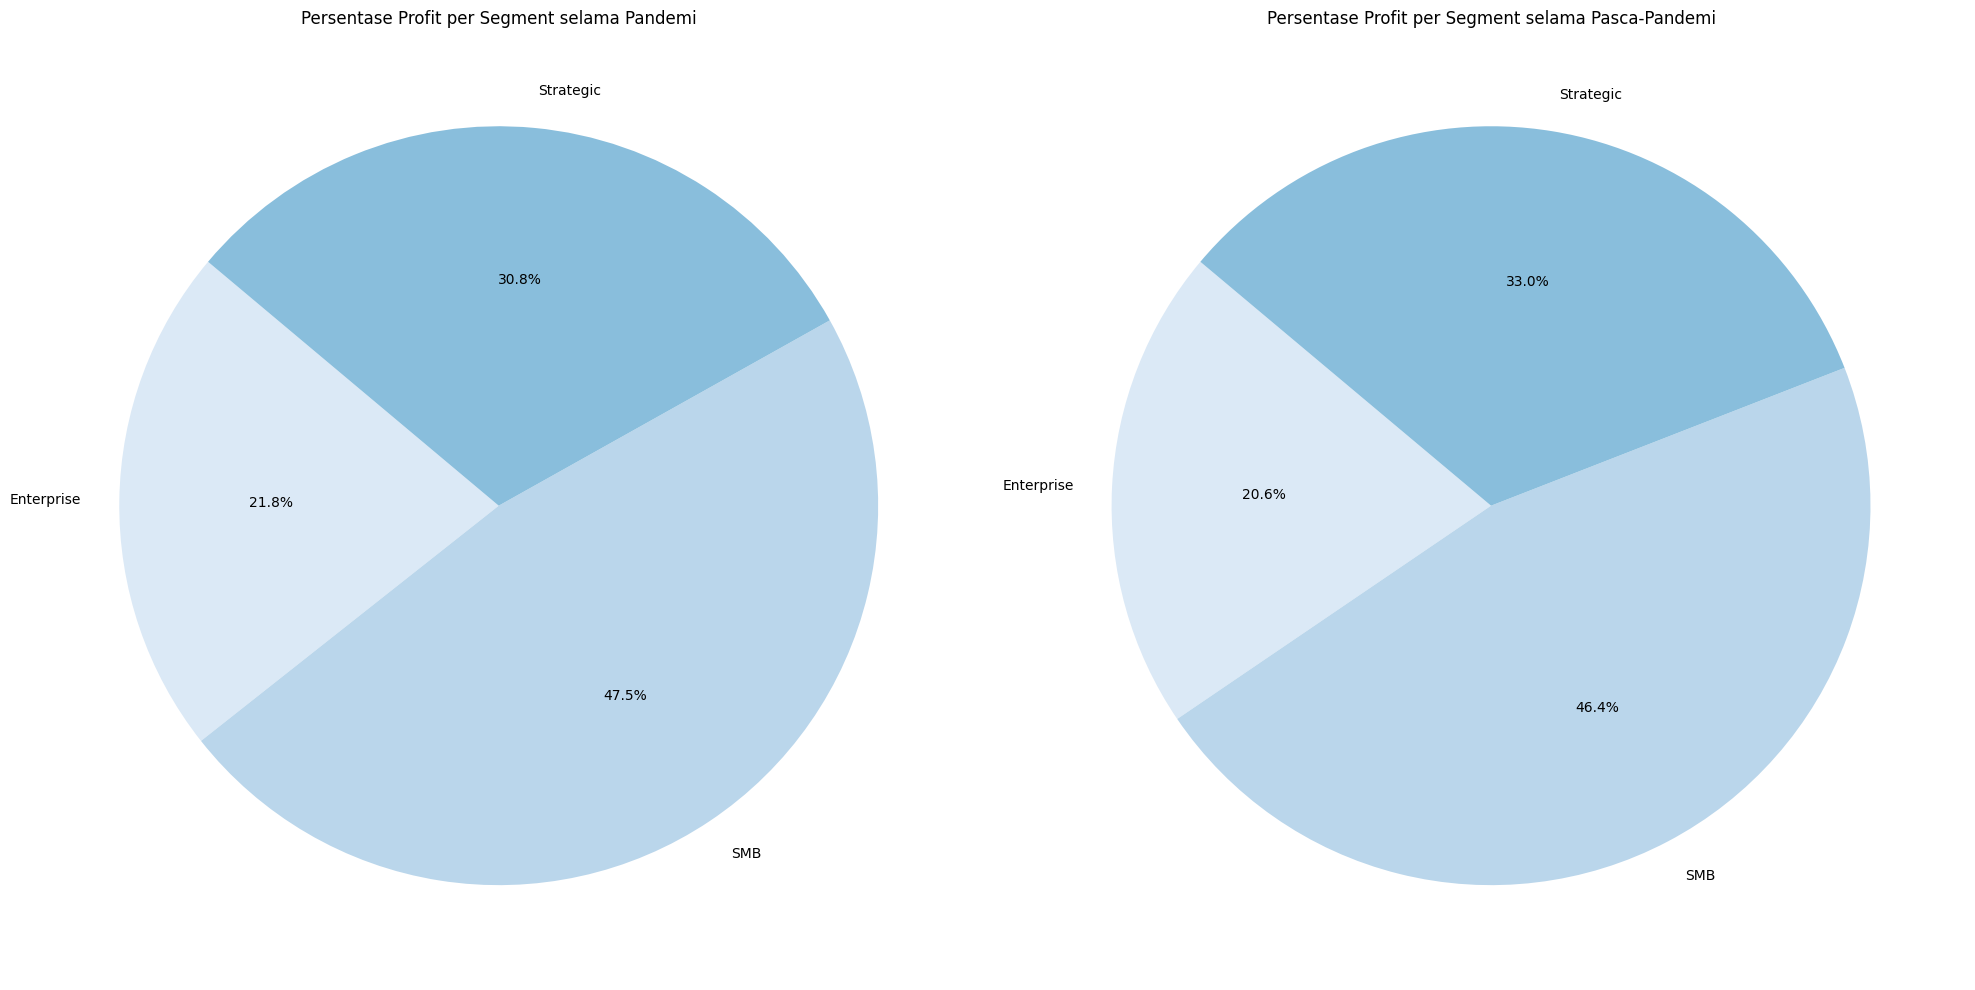

In [313]:
# Menghitung total profit dan persentase profit untuk setiap segment selama periode pandemi
pandemic_df = df[df['Periode'] == 'Pandemi']
pandemic_profit_percent = pandemic_df.groupby("Segment")[["Profit"]].sum()
total_pandemic_profit = pandemic_profit_percent["Profit"].sum()
pandemic_profit_percent["Profit_Percentage"] = (pandemic_profit_percent["Profit"] / total_pandemic_profit) * 100

# Menghitung total profit dan persentase profit untuk setiap segment selama periode pasca-pandemi
post_pandemic_df = df[df['Periode'] == 'Pasca-Pandemi']
post_pandemic_profit_percent = post_pandemic_df.groupby("Segment")[["Profit"]].sum()
total_post_pandemic_profit = post_pandemic_profit_percent["Profit"].sum()
post_pandemic_profit_percent["Profit_Percentage"] = (post_pandemic_profit_percent["Profit"] / total_post_pandemic_profit) * 100

# Menampilkan hasil dalam bentuk dataframe
pandemic_profit_percent_df = pandemic_profit_percent.reset_index()
post_pandemic_profit_percent_df = post_pandemic_profit_percent.reset_index()

# Membuat subplot untuk periode pandemi dan pasca-pandemi
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Pie chart untuk periode pandemi
axes[0].pie(pandemic_profit_percent["Profit_Percentage"], labels=pandemic_profit_percent_df['Segment'], autopct='%1.1f%%', startangle=140)
axes[0].set_title('Persentase Profit per Segment selama Pandemi')

# Pie chart untuk periode pasca-pandemi
axes[1].pie(post_pandemic_profit_percent["Profit_Percentage"], labels=post_pandemic_profit_percent_df['Segment'], autopct='%1.1f%%', startangle=140)
axes[1].set_title('Persentase Profit per Segment selama Pasca-Pandemi')

plt.tight_layout()
plt.show()


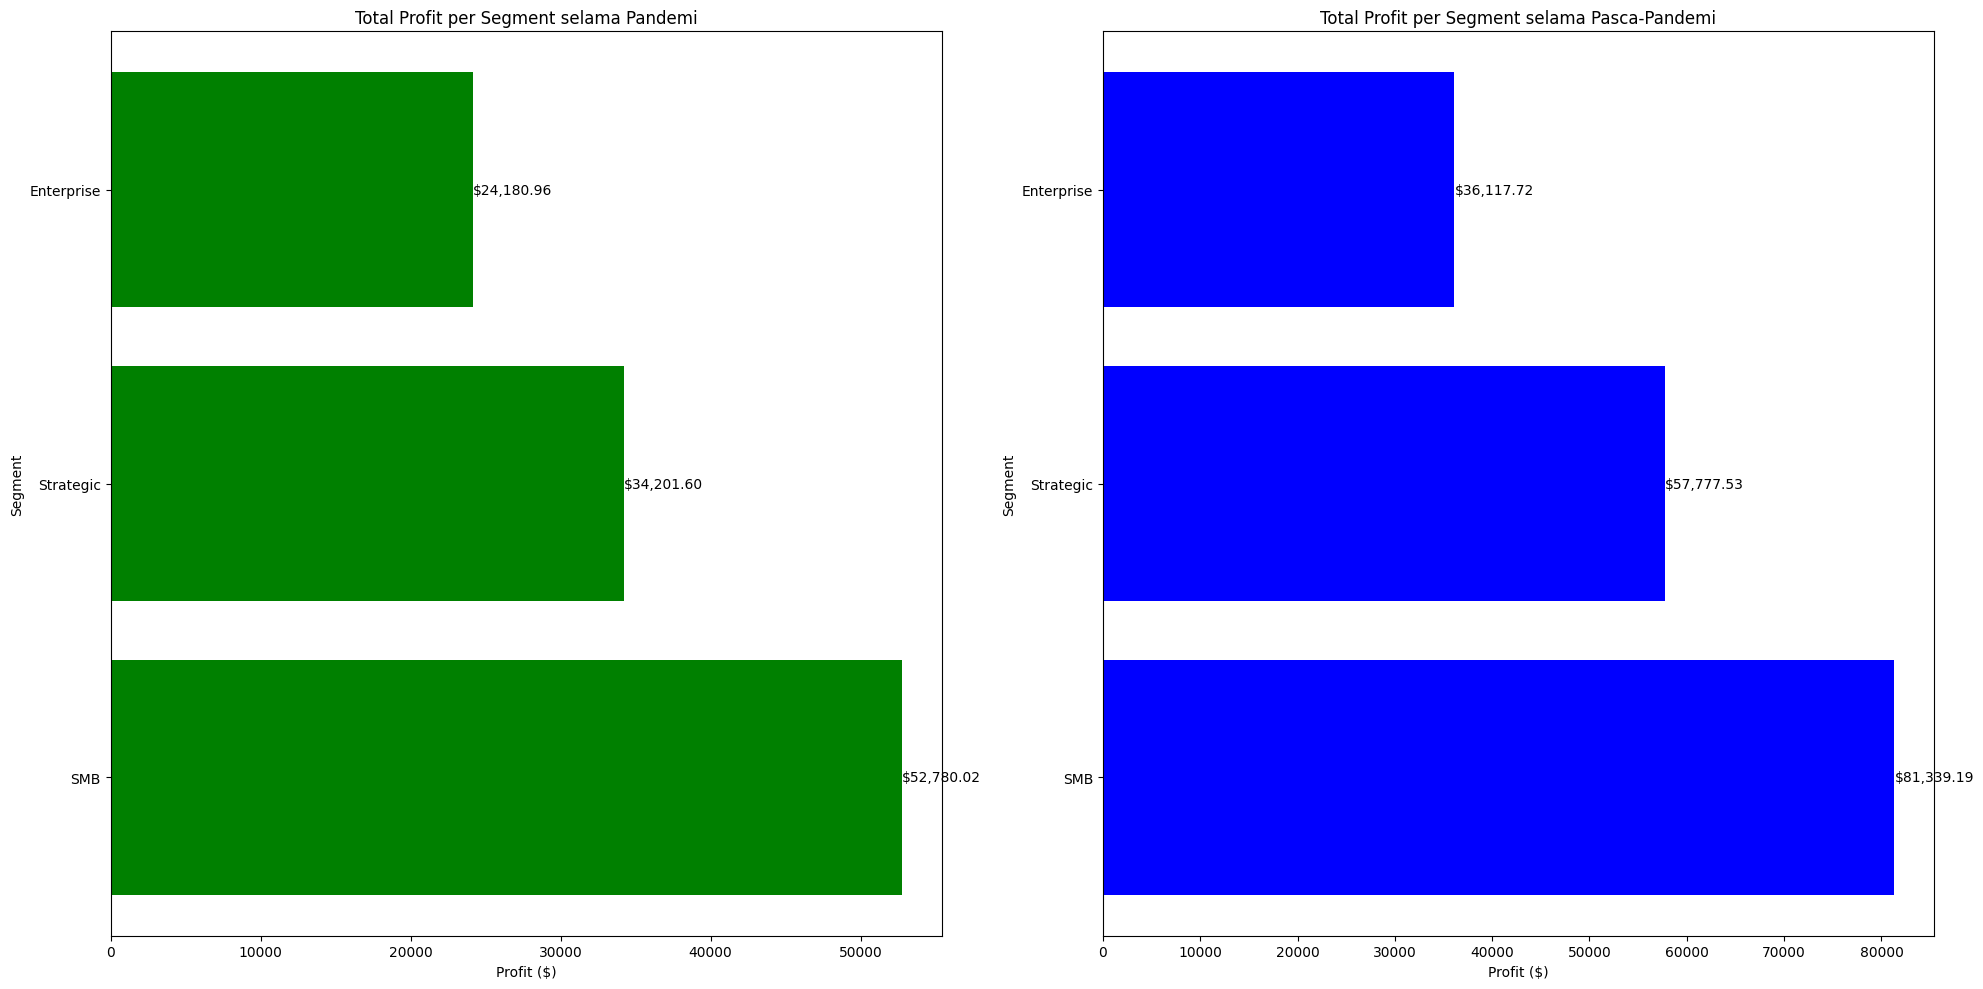

In [ ]:
# Menghitung total profit untuk setiap segment selama periode pandemi
pandemic_df = df[df['Periode'] == 'Pandemi']
pandemic_profit = pandemic_df.groupby("Segment")[["Profit"]].sum().sort_values(by="Profit", ascending=False)

# Menghitung total profit untuk setiap segment selama periode pasca-pandemi
post_pandemic_df = df[df['Periode'] == 'Pasca-Pandemi']
post_pandemic_profit = post_pandemic_df.groupby("Segment")[["Profit"]].sum().sort_values(by="Profit", ascending=False)

# Menampilkan hasil dalam bentuk dataframe
pandemic_profit_df = pandemic_profit.reset_index()
post_pandemic_profit_df = post_pandemic_profit.reset_index()

# Membuat subplot untuk periode pandemi dan pasca-pandemi
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Barplot horizontal untuk periode pandemi
axes[0].barh(pandemic_profit_df['Segment'], pandemic_profit['Profit'], color='green')
axes[0].set_xlabel('Profit ($)')
axes[0].set_ylabel('Segment')
axes[0].set_title('Total Profit per Segment selama Pandemi')

# Menampilkan nilai profit di atas setiap bar
for index, value in enumerate(pandemic_profit['Profit']):
    axes[0].text(value, index, f'${value:,.2f}', ha='left', va='center', color='black')

# Barplot horizontal untuk periode pasca-pandemi
axes[1].barh(post_pandemic_profit_df['Segment'], post_pandemic_profit['Profit'], color='blue')
axes[1].set_xlabel('Profit ($)')
axes[1].set_ylabel('Segment')
axes[1].set_title('Total Profit per Segment selama Pasca-Pandemi')

# Menampilkan nilai profit di atas setiap bar
for index, value in enumerate(post_pandemic_profit['Profit']):
    axes[1].text(value, index, f'${value:,.2f}', ha='left', va='center', color='black')

plt.tight_layout()
plt.show()


#### Insight Perubahan 

1. **Segmen SMB**:
    - **Pandemi**: Profit sebesar $52,780.02 dengan persentase profit 47.48%.
    - **Pasca-Pandemi**: Profit meningkat menjadi $81,339.19 dengan persentase profit 46.42%.
    - **Insight**: Segmen SMB mengalami peningkatan profit yang signifikan sebesar $28,559.17, tetapi persentase profit menurun sebesar 1.06%. Meskipun ada peningkatan dalam nilai profit, kontribusi total profit dari segmen SMB sedikit menurun.

2. **Segmen Strategic**:
    - **Pandemi**: Profit sebesar $34,201.60 dengan persentase profit 30.77%.
    - **Pasca-Pandemi**: Profit meningkat menjadi $57,777.53 dengan persentase profit 32.97%.
    - **Insight**: Segmen Strategic mencatat peningkatan profit yang signifikan sebesar $23,575.93, dan persentase profit meningkat sebesar 2.20%. Hal ini menunjukkan segmen Strategic telah tumbuh lebih cepat dan memiliki kontribusi lebih besar terhadap total profit dalam periode pasca-pandemi.

3. **Segmen Enterprise**:
    - **Pandemi**: Profit sebesar $24,180.96 dengan persentase profit 21.75%.
    - **Pasca-Pandemi**: Profit meningkat menjadi $36,117.72 dengan persentase profit 20.61%.
    - **Insight**: Segmen Enterprise mengalami peningkatan profit sebesar $11,936.76, tetapi persentase profit menurun sebesar 1.14%. Meskipun ada peningkatan dalam nilai profit, kontribusi total profit dari segmen Enterprise sedikit menurun.

Dari data di atas, **Segmen Strategic** menunjukkan pertumbuhan paling signifikan baik dalam nilai profit maupun persentase profit selama masa pasca-pandemi. Segmen ini telah berhasil meningkatkan profit sebesar $23,575.93 dan meningkatkan kontribusinya terhadap total profit. Di sisi lain, segmen SMB dan Enterprise juga mengalami peningkatan profit yang signifikan, tetapi persentase profit mereka menurun sedikit, menunjukkan kecepatan pertumbuhan yang lebih lambat dibandingkan segmen Strategic. Insight ini membantu memahami bagaimana berbagai segmen pelanggan berkontribusi terhadap profitabilitas perusahaan selama dan setelah pandemi.


### Uji Hipotesis Profit tiap Segmen saat dan setelah pandemi

In [388]:
# Group data by Segment and Periode
segments = df['Segment'].unique()

# Loop melalui setiap segmen
for segment in segments:
    print(f"Segment: {segment}")
    
    # Subset data untuk masing-masing periode
    data_pandemi = df[(df['Segment'] == segment) & (df['Periode'] == 'Pandemi')]['Profit']
    data_pasca_pandemi = df[(df['Segment'] == segment) & (df['Periode'] == 'Pasca-Pandemi')]['Profit']
    
    # Uji normalitas
    normal_pandemi = stats.shapiro(data_pandemi).pvalue > 0.1
    normal_pasca_pandemi = stats.shapiro(data_pasca_pandemi).pvalue > 0.1
    
    if normal_pandemi and normal_pasca_pandemi:
        # Jika data normal, gunakan t-test
        stat, p_value = stats.ttest_ind(data_pandemi, data_pasca_pandemi)
        test_type = "T-test"
    else:
        # Jika data tidak normal, gunakan Mann-Whitney U test
        stat, p_value = stats.mannwhitneyu(data_pandemi, data_pasca_pandemi)
        test_type = "Mann-Whitney U test"
    
    # Hasil
    print(f"  Test Type: {test_type}")
    print(f"  Statistic: {stat:.4f}, P-value: {p_value:.4f}")
    if p_value < 0.1:
        print("  Kesimpulan: Ada perbedaan signifikan.")
    else:
        print("  Kesimpulan: Tidak ada perbedaan signifikan.")
    print("-"*50)


Segment: SMB
  Test Type: Mann-Whitney U test
  Statistic: 3241652.5000, P-value: 0.3838
  Kesimpulan: Tidak ada perbedaan signifikan.
--------------------------------------------------
Segment: Strategic
  Test Type: Mann-Whitney U test
  Statistic: 1102288.0000, P-value: 0.8929
  Kesimpulan: Tidak ada perbedaan signifikan.
--------------------------------------------------
Segment: Enterprise
  Test Type: Mann-Whitney U test
  Statistic: 399127.0000, P-value: 0.0040
  Kesimpulan: Ada perbedaan signifikan.
--------------------------------------------------


In [390]:
from scipy.stats import chi2_contingency

# Menghitung total profit dan persentase profit untuk setiap segmen selama periode pandemi
pandemic_df = df[df['Periode'] == 'Pandemi']
pandemic_profit_percent = pandemic_df.groupby("Segment")[["Profit"]].sum()
total_pandemic_profit = pandemic_profit_percent["Profit"].sum()
pandemic_profit_percent["Profit_Percentage"] = (pandemic_profit_percent["Profit"] / total_pandemic_profit) * 100

# Menghitung total profit dan persentase profit untuk setiap segmen selama periode pasca-pandemi
post_pandemic_df = df[df['Periode'] == 'Pasca-Pandemi']
post_pandemic_profit_percent = post_pandemic_df.groupby("Segment")[["Profit"]].sum()
total_post_pandemic_profit = post_pandemic_profit_percent["Profit"].sum()
post_pandemic_profit_percent["Profit_Percentage"] = (post_pandemic_profit_percent["Profit"] / total_post_pandemic_profit) * 100

# Membuat DataFrame dari persentase profit
pandemic_profit_percent_df = pandemic_profit_percent.reset_index()
post_pandemic_profit_percent_df = post_pandemic_profit_percent.reset_index()

# Menyusun tabel kontingensi
contingency_table = pd.DataFrame({
    'Pandemi': pandemic_profit_percent["Profit_Percentage"],
    'Pasca_Pandemi': post_pandemic_profit_percent["Profit_Percentage"]
})

# Mengambil nilai test chi-squared
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Menampilkan hasil
print(f"Chi-Squared Statistic: {chi2_stat:.4f}")
print(f"P-Value: {p_val:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Significant Difference" if p_val < 0.05 else "No Significant Difference")


Chi-Squared Statistic: 0.1190
P-Value: 0.9422
Degrees of Freedom: 2
No Significant Difference


### insight akhir pola profit pandemi dan setelah pandemi tiap segment
Analisis menunjukkan bahwa proporsi profit antar segmen tidak menunjukkan perbedaan yang signifikan, namun segmen SMB mencatat perbedaan profit yang signifikan. Selama pandemi, segmen SMB memiliki profit sebesar $52,780.02 dengan persentase profit 47.48%. Setelah pandemi, profit meningkat menjadi $81,339.19 dengan persentase profit 46.42%. Meskipun kontribusi total profit dari segmen SMB sedikit menurun sebesar 1.06%, nilai profit mengalami peningkatan signifikan sebesar $28,559.17.

### Analysis Pola Product dan Profit Saat Pandemi dan Setelah Pandemi

In [357]:
# Menghitung total profit dan persentase profit untuk setiap produk selama periode pandemi
pandemic_df = df[df['Periode'] == 'Pandemi']
pandemic_profit_percent = pandemic_df.groupby("Product")[["Profit"]].sum()
total_pandemic_profit = pandemic_profit_percent["Profit"].sum()
pandemic_profit_percent["Profit_Percentage"] = (pandemic_profit_percent["Profit"] / total_pandemic_profit) * 100

# Menghitung total profit dan persentase profit untuk setiap produk selama periode pasca-pandemi
post_pandemic_df = df[df['Periode'] == 'Pasca-Pandemi']
post_pandemic_profit_percent = post_pandemic_df.groupby("Product")[["Profit"]].sum()
total_post_pandemic_profit = post_pandemic_profit_percent["Profit"].sum()
post_pandemic_profit_percent["Profit_Percentage"] = (post_pandemic_profit_percent["Profit"] / total_post_pandemic_profit) * 100

# Menghitung persentase kenaikan profit
increase_percent = (post_pandemic_profit_percent["Profit"] - pandemic_profit_percent["Profit"]) / pandemic_profit_percent["Profit"] * 100

# Menambahkan kolom persentase kenaikan profit
post_pandemic_profit_percent["Increase_Percentage"] = increase_percent.round(2)

# Membulatkan ke dua tempat desimal
pandemic_profit_percent["Profit_Percentage"] = pandemic_profit_percent["Profit_Percentage"].round(2)
post_pandemic_profit_percent["Profit_Percentage"] = post_pandemic_profit_percent["Profit_Percentage"].round(2)

# Format kolom Profit supaya memiliki separator ribuan dan dua tempat desimal
pandemic_profit_percent["Profit"] = pandemic_profit_percent["Profit"].map('{:,.2f}'.format)
post_pandemic_profit_percent["Profit"] = post_pandemic_profit_percent["Profit"].map('{:,.2f}'.format)

# Menyortir berdasarkan persentase profit dalam urutan menurun
pandemic_profit_percent = pandemic_profit_percent.sort_values("Profit_Percentage", ascending=False)
post_pandemic_profit_percent = post_pandemic_profit_percent.sort_values("Profit_Percentage", ascending=False)

# Menampilkan hasil dalam bentuk dataframe
pandemic_profit_percent_df = pandemic_profit_percent.reset_index()
post_pandemic_profit_percent_df = post_pandemic_profit_percent.reset_index()

# Menampilkan dataframes
print("Profit dan Persentase Profit Selama Pandemi:")
display(pandemic_profit_percent_df)
print("\nProfit dan Persentase Profit Selama Pasca-Pandemi:")
display(post_pandemic_profit_percent_df)


Profit dan Persentase Profit Selama Pandemi:


,Product,Profit,Profit_Percentage
0,Site Analytics,"22,206.81",19.98
1,Data Smasher,"16,599.99",14.93
2,FinanceHub,"15,792.50",14.21
3,Support,"13,406.37",12.06
4,Alchemy,"12,843.24",11.55
5,Marketing Suite - Gold,"7,671.74",6.90
6,ContactMatcher,"5,702.54",5.13
7,SaaS Connector Pack,"5,024.71",4.52
8,OneView,"4,971.40",4.47
9,SaaS Connector Pack - Gold,"3,455.67",3.11



Profit dan Persentase Profit Selama Pasca-Pandemi:


,Product,Profit,Profit_Percentage,Increase_Percentage
0,Alchemy,"42,774.58",24.41,233.05
1,Data Smasher,"25,336.65",14.46,52.63
2,Site Analytics,"22,308.92",12.73,0.46
3,Support,"19,458.10",11.10,45.14
4,FinanceHub,"16,343.92",9.33,3.49
5,Marketing Suite - Gold,"13,607.09",7.77,77.37
6,OneView,"13,166.61",7.51,164.85
7,SaaS Connector Pack,"8,034.43",4.58,59.90
8,ContactMatcher,"6,793.74",3.88,19.14
9,ChatBot Plugin,"3,635.93",2.07,25.73


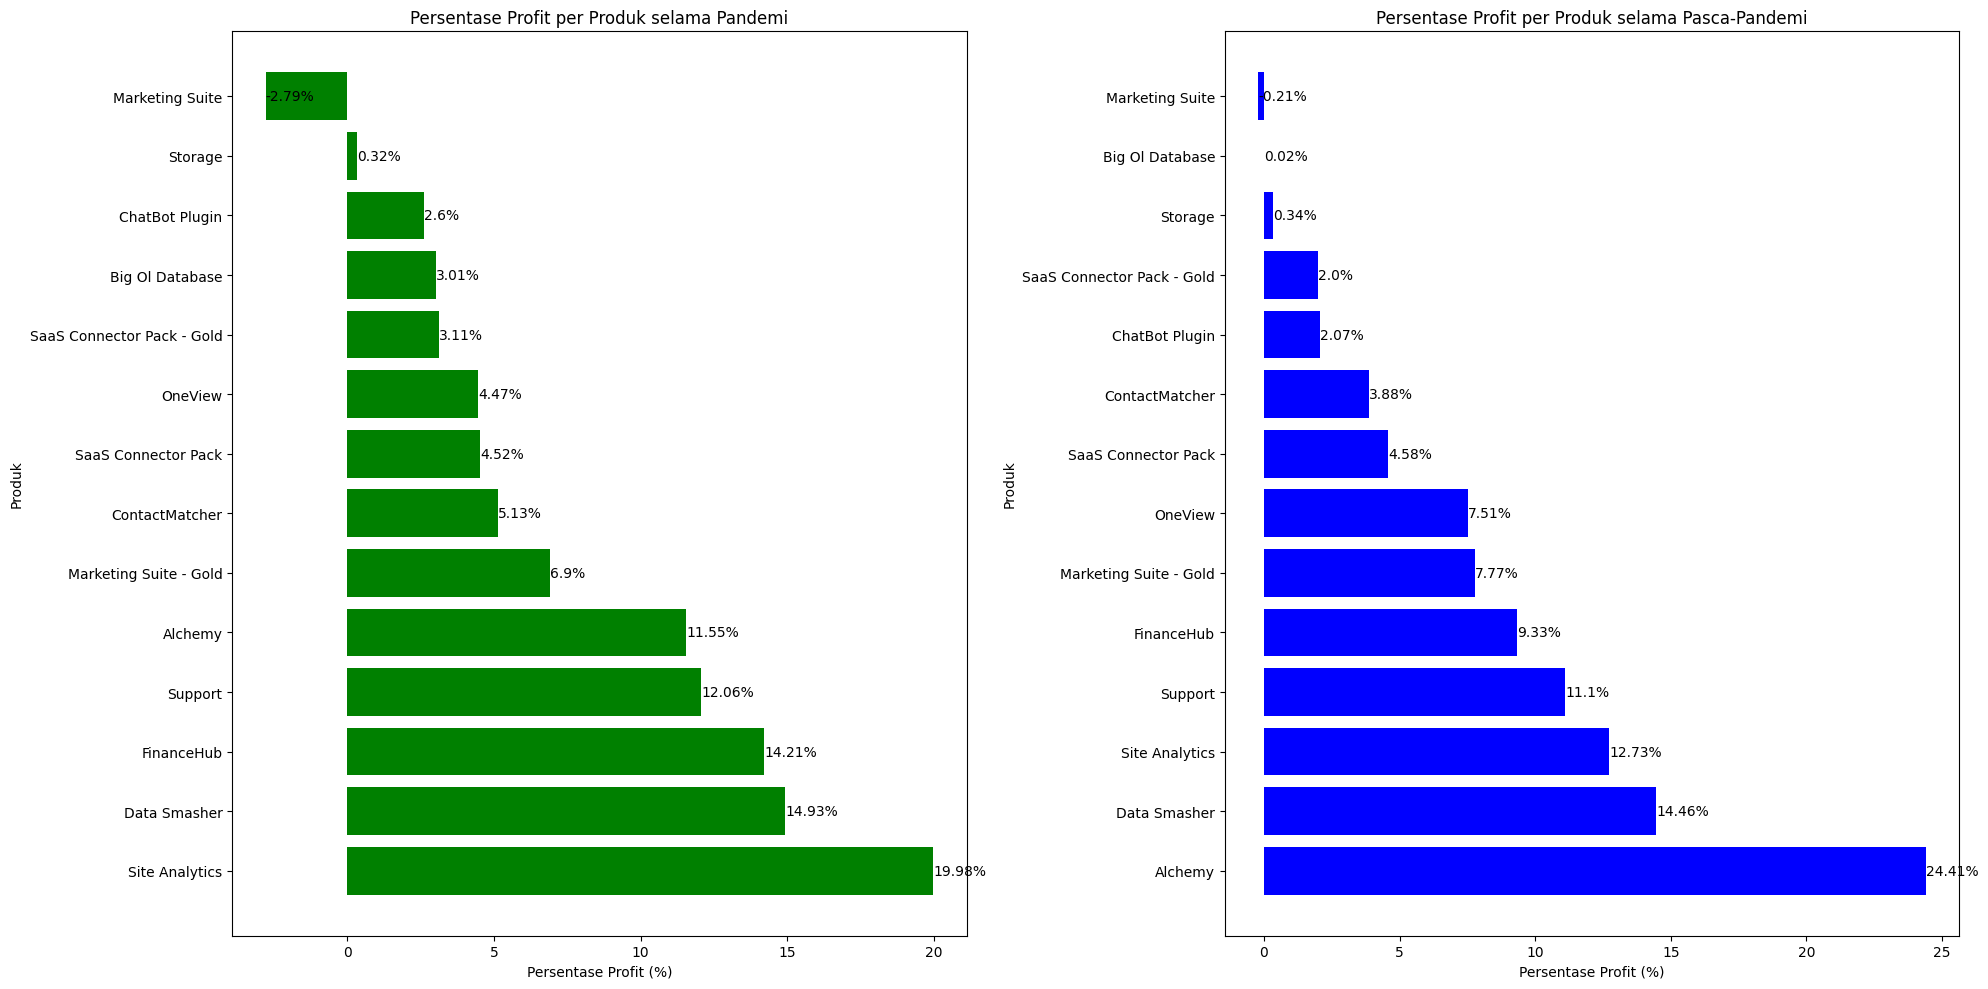

In [292]:
# Menghitung total profit dan persentase profit untuk setiap produk selama periode pandemi
pandemic_df = df[df['Periode'] == 'Pandemi']
pandemic_profit_percent = pandemic_df.groupby("Product")[["Profit"]].sum()
total_pandemic_profit = pandemic_profit_percent["Profit"].sum()
pandemic_profit_percent["Profit_Percentage"] = (pandemic_profit_percent["Profit"] / total_pandemic_profit) * 100

# Rounding to 2 decimal places
pandemic_profit_percent["Profit_Percentage"] = pandemic_profit_percent["Profit_Percentage"].round(2)

# Formatting Profit column to include thousand separator and two decimal places
pandemic_profit_percent["Profit"] = pandemic_profit_percent["Profit"].map('{:,.2f}'.format)

# Sorting by Profit Percentage in descending order
pandemic_profit_percent = pandemic_profit_percent.sort_values("Profit_Percentage", ascending=False)

# Menghitung total profit dan persentase profit untuk setiap produk selama periode pasca-pandemi
post_pandemic_df = df[df['Periode'] == 'Pasca-Pandemi']
post_pandemic_profit_percent = post_pandemic_df.groupby("Product")[["Profit"]].sum()
total_post_pandemic_profit = post_pandemic_profit_percent["Profit"].sum()
post_pandemic_profit_percent["Profit_Percentage"] = (post_pandemic_profit_percent["Profit"] / total_post_pandemic_profit) * 100

# Rounding to 2 decimal places
post_pandemic_profit_percent["Profit_Percentage"] = post_pandemic_profit_percent["Profit_Percentage"].round(2)

# Formatting Profit column to include thousand separator and two decimal places
post_pandemic_profit_percent["Profit"] = post_pandemic_profit_percent["Profit"].map('{:,.2f}'.format)

# Sorting by Profit Percentage in descending order
post_pandemic_profit_percent = post_pandemic_profit_percent.sort_values("Profit_Percentage", ascending=False)

# Menampilkan hasil dalam bentuk dataframe
pandemic_profit_percent_df = pandemic_profit_percent.reset_index()
post_pandemic_profit_percent_df = post_pandemic_profit_percent.reset_index()

# Membuat subplot untuk periode pandemi dan pasca-pandemi
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Barplot horizontal untuk periode pandemi
axes[0].barh(pandemic_profit_percent_df['Product'], pandemic_profit_percent_df['Profit_Percentage'], color='green')
axes[0].set_xlabel('Persentase Profit (%)')
axes[0].set_ylabel('Produk')
axes[0].set_title('Persentase Profit per Produk selama Pandemi')

# Menampilkan nilai persentase profit di atas setiap bar
for index, value in enumerate(pandemic_profit_percent_df['Profit_Percentage']):
    axes[0].text(value, index, f'{value}%', ha='left', va='center', color='black')

# Barplot horizontal untuk periode pasca-pandemi
axes[1].barh(post_pandemic_profit_percent_df['Product'], post_pandemic_profit_percent_df['Profit_Percentage'], color='blue')
axes[1].set_xlabel('Persentase Profit (%)')
axes[1].set_ylabel('Produk')
axes[1].set_title('Persentase Profit per Produk selama Pasca-Pandemi')

# Menampilkan nilai persentase profit di atas setiap bar
for index, value in enumerate(post_pandemic_profit_percent_df['Profit_Percentage']):
    axes[1].text(value, index, f'{value}%', ha='left', va='center', color='black')

plt.tight_layout()
plt.show()


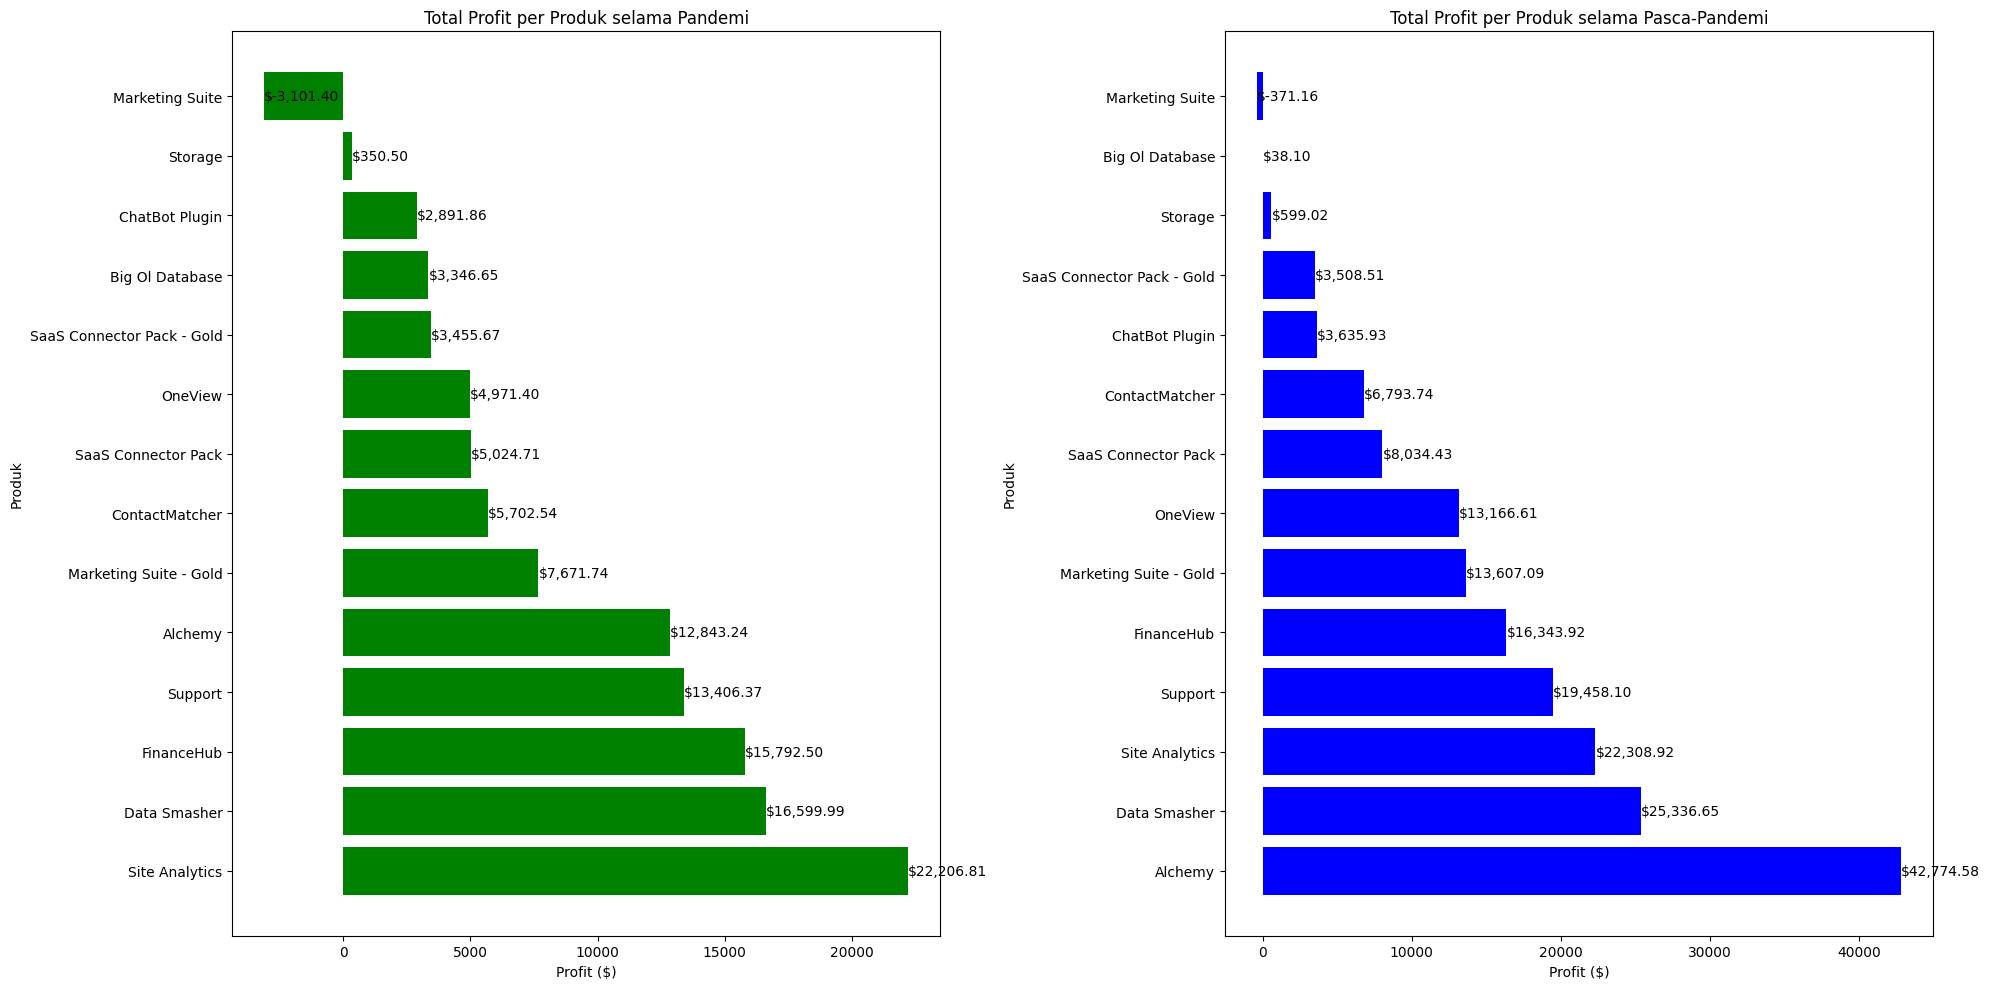

In [293]:
# Menghitung total profit untuk setiap produk selama periode pandemi
pandemic_df = df[df['Periode'] == 'Pandemi']
pandemic_profit = pandemic_df.groupby("Product")[["Profit"]].sum().sort_values(by="Profit", ascending=False)

# Menghitung total profit untuk setiap produk selama periode pasca-pandemi
post_pandemic_df = df[df['Periode'] == 'Pasca-Pandemi']
post_pandemic_profit = post_pandemic_df.groupby("Product")[["Profit"]].sum().sort_values(by="Profit", ascending=False)

# Menampilkan hasil dalam bentuk dataframe
pandemic_profit_df = pandemic_profit.reset_index()
post_pandemic_profit_df = post_pandemic_profit.reset_index()

# Membuat subplot untuk periode pandemi dan pasca-pandemi
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Barplot horizontal untuk periode pandemi
axes[0].barh(pandemic_profit_df['Product'], pandemic_profit['Profit'], color='green')
axes[0].set_xlabel('Profit ($)')
axes[0].set_ylabel('Produk')
axes[0].set_title('Total Profit per Produk selama Pandemi')

# Menampilkan nilai profit di atas setiap bar
for index, value in enumerate(pandemic_profit['Profit']):
    axes[0].text(value, index, f'${value:,.2f}', ha='left', va='center', color='black')

# Barplot horizontal untuk periode pasca-pandemi
axes[1].barh(post_pandemic_profit_df['Product'], post_pandemic_profit['Profit'], color='blue')
axes[1].set_xlabel('Profit ($)')
axes[1].set_ylabel('Produk')
axes[1].set_title('Total Profit per Produk selama Pasca-Pandemi')

# Menampilkan nilai profit di atas setiap bar
for index, value in enumerate(post_pandemic_profit['Profit']):
    axes[1].text(value, index, f'${value:,.2f}', ha='left', va='center', color='black')

plt.tight_layout()
plt.show()


#### Insight Perubahan 

1. **Alchemy**:
    - **Pandemi**: Profit sebesar $12,843.24 dengan persentase profit 11.55%.
    - **Pasca-Pandemi**: Profit meningkat menjadi $42,774.58 dengan persentase profit 24.41%.
    - **Insight**: Alchemy mengalami peningkatan profit yang signifikan sebesar $29,931.34 dan persentase profit meningkat sebesar 12.86%.

2. **Site Analytics**:
    - **Pandemi**: Profit sebesar $22,206.81 dengan persentase profit 19.98%.
    - **Pasca-Pandemi**: Profit meningkat menjadi $22,308.92 dengan persentase profit 12.73%.
    - **Insight**: Meskipun profit meningkat sedikit sebesar $102.11, persentase profit menurun sebesar 7.25%.

3. **FinanceHub**:
    - **Pandemi**: Profit sebesar $15,792.50 dengan persentase profit 14.21%.
    - **Pasca-Pandemi**: Profit meningkat menjadi $16,343.92 dengan persentase profit 9.33%.
    - **Insight**: Profit meningkat sebesar $551.42, namun persentase profit menurun sebesar 4.88%.

4. **Marketing Suite**:
    - **Pandemi**: Profit sebesar -$3,101.40 dengan persentase profit -2.79%.
    - **Pasca-Pandemi**: Profit meningkat menjadi -$371.16 dengan persentase profit -0.21%.
    - **Insight**: Meskipun masih negatif, Marketing Suite mengalami peningkatan profit sebesar $2,730.24 dan persentase profit meningkat sebesar 2.58%.

5. **ContactMatcher**:
    - **Pandemi**: Profit sebesar $5,702.54 dengan persentase profit 5.13%.
    - **Pasca-Pandemi**: Profit meningkat menjadi $6,793.74 dengan persentase profit 3.88%.
    - **Insight**: Profit meningkat sebesar $1,091.20, namun persentase profit menurun sebesar 1.25%.
6. **big Ol Database**:
    - **Pandemi**: Profit sebesar $3,346.65 dengan persentase profit 3.01%.
    - **Pasca-Pandemi**: Profit menurun menjadi $38.10 dengan persentase profit 0.02%.
    - **Insight**: Big Ol Database mengalami penurunan profit yang signifikan sebesar $3,308.55 dan persentase profit menurun sebesar 2.99%. Hal ini menunjukkan penurunan drastis dalam performa produk ini setelah pandemi.

Dari data di atas, produk **Alchemy** menunjukkan perubahan terbesar dengan peningkatan profit yang signifikan dari periode pandemi ke pasca-pandemi. Produk ini mengalami peningkatan profit sebesar $29,931.34.


### Insight Akhir Pola Profit pandemi dan pasca pandemi untuk tiap Product
dua produk yang menunjukkan perbedaan signifikan adalah Alchemy dan Big Ol Database. Produk Alchemy mencatat peningkatan profit yang sangat signifikan dari $12,843.24 selama pandemi (11.55%) menjadi $42,774.58 pasca-pandemi (24.41%), dengan kenaikan profit sebesar $29,931.34 dan peningkatan persentase profit sebesar 12.86%. Di sisi lain, Big Ol Database menyaksikan penurunan profit yang signifikan, dari $3,346.65 selama pandemi (3.01%) menjadi $38.10 pasca-pandemi (0.02%), dengan penurunan profit sebesar $3,308.55 dan penurunan persentase profit sebesar 2.99%. Perbedaan signifikan ini mencerminkan dinamika performa yang sangat kontras dari kedua produk ini setelah pandemi.


# Rekomendasi

## Rekomendasi Strategi

Berdasarkan insight yang diperoleh dari analisis profit perusahaan selama dan setelah pandemi, perusahaan dapat mengembangkan strategi sebagai berikut untuk menghadapi situasi serupa di masa depan:

1. **Diversifikasi Produk**: Mengidentifikasi dan mengembangkan produk yang memiliki potensi untuk mengalami peningkatan permintaan signifikan seperti **Consumer Products** selama pandemi. Diversifikasi produk dapat membantu perusahaan mengurangi risiko dan memaksimalkan potensi profit.

2. **Peningkatan Infrastruktur Teknologi**: Produk dalam kategori **Tech** menunjukkan peningkatan signifikan pasca-pandemi. Perusahaan perlu berinvestasi lebih lanjut dalam teknologi dan infrastruktur digital untuk mendukung pertumbuhan dan efisiensi operasional.

3. **Stabilitas dan Pertumbuhan Keuangan**: Sektor **Finance** menunjukkan peningkatan profit yang stabil setelah pandemi. Perusahaan perlu membangun portofolio keuangan yang kuat dan beradaptasi dengan perubahan ekonomi global untuk menjaga stabilitas finansial.

4. **Perluasan Pasar Regional**: Dari data, **Region APJ** dan **Region AMER** mengalami peningkatan profit yang signifikan setelah pandemi. Perusahaan sebaiknya fokus pada ekspansi pasar di region berkembang, terutama di Asia Pasifik dan Amerika, untuk memanfaatkan potensi pertumbuhan.

5. **Manajemen Risiko**: Menghadapi ketidakpastian ekonomi dan pasar, manajemen risiko harus menjadi bagian integral dari strategi perusahaan. Menyusun rencana kontingensi dan proaktif dalam menghadapi tantangan dapat membantu perusahaan bertahan dan berkembang dalam situasi krisis.

6. **Investasi dalam Sumber Daya Manusia**: Memperkuat tenaga kerja dengan meningkatkan keterampilan dan pelatihan karyawan dapat membantu perusahaan beradaptasi dengan cepat terhadap perubahan dan memanfaatkan peluang baru yang muncul.

7. **Optimalisasi Operasional**: Perusahaan dapat belajar dari penurunan signifikan yang dialami produk seperti **Big Ol Database**. Mengidentifikasi faktor-faktor yang berkontribusi terhadap penurunan performa dan mengambil langkah-langkah untuk meningkatkan efisiensi dan produktivitas operasional dapat mencegah kerugian di masa depan.

## Kesimpulan

Dengan strategi yang tepat, perusahaan dapat memperkuat posisinya di pasar dan menghadapi tantangan yang mungkin muncul di masa depan. Diversifikasi produk, peningkatan teknologi, ekspansi pasar regional, dan manajemen risiko yang efektif adalah kunci untuk meraih profit yang berkelanjutan dan berkembang bahkan dalam situasi krisis.
